# コードのテスト
## grad_cam_util.py の関数について
- gradcamのutil関数について

## モジュールimport

In [1]:
# モジュールimport
import os, sys
sys.path.append(r'C:\Users\shingo\jupyter_notebook\tfgpu_py36_work\02_keras_py')
from dataset import plot_log, prepare_data, util, plot_12task_log, util
from transformer import get_train_valid_test, my_generator
from model import define_model, multi_loss, my_callback, my_metric
from predicter import roc_curve, conf_matrix, multi_predict, grad_cam, ensemble_predict, base_predict, grad_cam_util
from tuning import optuna_train_base, optuna_train_Tox21, optuna_util

plot_log.py: loaded as module file
prepare_data.py: loaded as module file
util.py: loaded as module file
plot_12task_log.py: loaded as module file


Using TensorFlow backend.


get_train_valid_test.py: loaded as module file
my_generator.py: loaded as module file
define_model.py: loaded as module file
multi_loss.py: loaded as module file
my_callback.py: loaded as module file
my_metric.py: loaded as module file
roc_curve.py: loaded as module file
conf_matrix.py: loaded as module file
multi_predict.py: loaded as module file
grad_cam.py: loaded as module file
ensemble_predict.py: loaded as module file
base_predict.py: loaded as module file
grad_cam_util.py: loaded as module file
optuna_train_base.py: loaded as module file
optuna_train.py: loaded as module file
optuna_util.py: loaded as module file


## テスト用に画像を少数でtrain/validation/test set に分ける
- train_count=400*11
- valid_count=40*11
- test_count=10*11

In [47]:
import os, shutil, glob
from tqdm import tqdm

def split_class_train_valid_test_set(class_name_list, source_dir, img_dir
                                     , train_count_org=10, valid_count_org=5, test_count_org=5):
    """
    クラスディレクトリごとに別れた指定ディレクトリの画像を tarin/val set に分けてコピーする
    クラスごとの画像枚数の指定（train_count_org, valid_count_org, test_count_org）がなければ train:0.8, valid:0.15, test:0.05 の割合でコピー
    """   
    print('source_dir :', source_dir)
    print('img_dir :', img_dir)
    print('---------------------------------------------------------------')
    for class_name in class_name_list:
        print('class_name :', class_name)
        
        # クラスごとの画像枚数初期化
        train_count = train_count_org
        valid_count = valid_count_org
        test_count = test_count_org
        
        # クラスごとの画像総数
        class_source_dir = os.path.join(source_dir, class_name)
        # ファイル名一応ソートしておく
        id_imgs = sorted(glob.glob(os.path.join(class_source_dir, '*jpg')))
        id_imgs_png = sorted(glob.glob(os.path.join(class_source_dir, '*png')))
        id_imgs.extend(id_imgs_png)
        id_imgs = sorted(id_imgs)
        print('imgs:', len(id_imgs))

        # 画像ディレクトリ作成
        train_dir = os.path.join(img_dir, 'train', class_name)
        valid_dir = os.path.join(img_dir, 'validation', class_name)
        test_dir = os.path.join(img_dir, 'test', class_name)
        os.makedirs(train_dir, exist_ok=True)
        os.makedirs(valid_dir, exist_ok=True)
        os.makedirs(test_dir, exist_ok=True)

        # train/validation/test set に分ける画像枚数していなければ 8:1.5:0.5 で分ける
        # クラス画像の総数の方が分ける画像数より多くても 8:1.5:0.5 で分ける
        if (train_count_org is None) or (train_count_org+valid_count_org+test_count_org > len(id_imgs)):
            test_count =  int(len(id_imgs)*0.05)
            valid_count = int(len(id_imgs)*0.15)
            train_count = len(id_imgs) - valid_count - test_count

        # test img copy
        for img in tqdm(id_imgs[0: test_count]):
            shutil.copyfile(img, os.path.join(test_dir, os.path.basename(img)))
        # validation img copy
        for img in tqdm(id_imgs[test_count: valid_count+test_count]):
            shutil.copyfile(img, os.path.join(valid_dir, os.path.basename(img)))
        # train img copy
        for img in tqdm(id_imgs[valid_count+test_count: train_count+valid_count+test_count]):
            shutil.copyfile(img, os.path.join(train_dir, os.path.basename(img)))


In [48]:
# クラス名のリスト
class_name = ['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']

# 全画像格納しているディレクトリ
source_dir = r'D:\work\keras_iPhone_pictures\InceptionResNetV2'

# train/validation/test set に分ける画像ディレクトリ
#img_dir = r'D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_10'
#img_dir = r'D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_100'
img_dir = r'D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400'

train_1class_count = 400#100 #10 # train 1クラスの画像枚数
valid_1class_count = 40#10 #5 # validaiton 1クラスの画像枚数
test_1class_count = 10#10 #5  # test 1クラスの画像枚数

# クラスディレクトリごとに別れた指定ディレクトリの画像を tarin/val set に分けてコピーする
split_class_train_valid_test_set(class_name, source_dir, img_dir
                                 , train_count_org=train_1class_count
                                 , valid_count_org=valid_1class_count
                                 , test_count_org=test_1class_count
                                )

source_dir : D:\work\keras_iPhone_pictures\InceptionResNetV2
img_dir : D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400
---------------------------------------------------------------
class_name : beagle
imgs: 1127



100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:04<00:00, 88.16it/s]

class_name : bikini
imgs: 565



100%|███████████████████████████████████████████████████████████████████████████████| 400/400 [00:01<00:00, 214.61it/s]

class_name : boke
imgs: 39



100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 84.15it/s]

class_name : cat
imgs: 33



100%|█████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 122.89it/s]

class_name : comic_book
imgs: 847



100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:14<00:00, 27.48it/s]

class_name : fashion
imgs: 3626



100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:10<00:00, 36.89it/s]

class_name : marin
imgs: 606



100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:25<00:00, 15.80it/s]

class_name : other
imgs: 4109



100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:23<00:00, 16.77it/s]

class_name : shingo
imgs: 1091



100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 62.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:20<00:00, 19.55it/s]

class_name : suit
imgs: 60



100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 11.47it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:01<00:00, 36.75it/s]

class_name : tumblr
imgs: 688



100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:07<00:00, 50.75it/s]

## パラメータ設定

In [2]:
import keras
import os, sys, glob, time

# 出力ディレクトリ
#output_dir = r'D:\work\keras_iPhone_pictures\01_classes_results\20190122'
output_dir = r'D:\work\keras_iPhone_pictures\01_classes_results\20190122_NASNetLarge'
os.makedirs(output_dir, exist_ok=True)

# 入力ディレクトリ
train_data_dir = r'D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\train'
train_samples = util.file_count(train_data_dir, r'.JPG')+util.file_count(train_data_dir, r'.PNG')+util.file_count(train_data_dir, r'.jpg')+util.file_count(train_data_dir, r'.png') 
print('train_samples:', train_samples)

validation_data_dir = r'D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\validation'
val_samples = util.file_count(validation_data_dir, r'.JPG')+util.file_count(validation_data_dir, r'.PNG')+util.file_count(validation_data_dir, r'.jpg')+util.file_count(validation_data_dir, r'.png')
print('val_samples:', val_samples)

# テスト画像ディレクトリ
test_dir = r'D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\test'

# 入力層のサイズ
img_rows, img_cols, channels=331, 331, 3
#img_rows, img_cols, channels=100, 100, 3

# 分類クラス
class_name = ['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']
classes = class_name
nb_classes = len(classes)
activation='softmax'

# GradCamで切り出す層名
layer_name = 'multiply_1'

# ハイパーパラメータ
num_epoch=10
batch_size=5#20 # InceptionResNetV2 はbatch_size=20 いけるが、NASNetLarge はbatch_size=5 までしか無理
val_batch_size=5
test_batch_size=1

# optimizer のパラメータ
choice_optim='sgd'
lr=0.1 * batch_size / 128
#decay=1e-3
momentum=0.9

# fine-tuningモデル
choice_model='NASNetLarge'#'InceptionResNetV2'
trainable=761

# 全結合層
FCnum=1

# 学習打ち切りオプション
early_stopping=10

plateau_pati=5
plateau_factor=0.5 # コールバックが起動したら学習率0.9倍
plateau_monitor='val_loss'

# https://qiita.com/ak11/items/67118e11b756b0ee83a5
base_lr = lr #0.1 * batch_size / 128  # adamとかなら1e-3くらい。SGDなら例えば 0.1 * batch_size / 128 とかくらい。nadamなら0.002*10 ?
lr_decay_rate = 1/2#1 / 3
lr_steps = 2#4

### 訓練画像水増しオプション
# ImageDataGenerator
rescale=1.0/255.0
horizontal_flip=True
zoom_range=0.2
rotation_range=20
channel_shift_range=5.
brightness_range=[0.3, 1.0]
# custom param
#mix_up_alpha=0.2# mixup alpha
#random_crop=[224,224]# random_crop size
random_erasing_prob = 0.5 # random_erasing 確率
random_erasing_maxpixel = 255

# MyImageDataGenerator のオプションを辞書型で詰める
my_IDG_options={'rescale': rescale
             , 'horizontal_flip': horizontal_flip
             , 'zoom_range': zoom_range
             , 'rotation_range': rotation_range 
             , 'channel_shift_range': channel_shift_range
             , 'brightness_range': brightness_range
             , 'random_erasing_prob': random_erasing_prob
             , 'random_erasing_maxpixel': random_erasing_maxpixel
            }

train_samples: 3309
val_samples: 338


## data generator定義
- データ管理クラス：d_cls

In [3]:
d_cls = get_train_valid_test.LabeledDataset([img_rows, img_cols, channels]
                                            , batch_size
                                            , valid_batch_size=val_batch_size
                                            , test_batch_size=test_batch_size)

d_cls.create_my_generator_flow_from_directory(train_data_dir
                                              , classes
                                              , valid_data_dir=validation_data_dir
                                              , test_data_dir=test_dir
                                              , color_mode='rgb'
                                              , class_mode='categorical'
                                              , my_IDG_options=my_IDG_options)

my_generator.py: loaded as module file
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.


(<generator object MyImageDataGenerator.flow_from_directory at 0x0000022AAC54C1A8>,
 <keras.preprocessing.image.DirectoryIterator at 0x22aac549f60>)

Found 3309 images belonging to 11 classes.
(5, 331, 331, 3)
(5, 11)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']


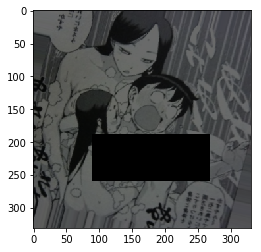

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x,y = next(d_cls.train_gen)
print(x.shape)
print(y.shape)
print(y[0])
print(classes)
plt.imshow(x[0])
plt.show()

## ニューラルネットワーク定義

- InceptionResNetV2+SE+FC1
- 761層以前をfreeze(ただし、Batch Normalizationはfreeze解除)

In [39]:
# モデル定義
model, orig_model = define_model.get_fine_tuning_model(output_dir, img_rows, img_cols, channels, nb_classes
                                                       , choice_model, trainable
                                                       , FCnum=FCnum
                                                       , activation=activation
                                                       , add_se=True
                                                      )
# compile the model
optim = define_model.get_optimizers(choice_optim=choice_optim, lr=lr, momentum=momentum, nesterov=True)#, decay=decay)
#lr_metric = my_metric.get_lr_metric(optim)
model.compile(loss='categorical_crossentropy'
              , optimizer=optim
              , metrics=['acc'])
              #, metrics=['accuracy', lr_metric])

# finetunning用にレイヤーの数と名前を表示
count= 0
for layer in model.layers:
    print(count, layer.name)
    count+=1
keras.utils.plot_model(model, to_file=os.path.join(output_dir, 'InceptionResNetV2_SE_FC1.svg'), show_shapes=True)

model.summary()

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122_NASNetLarge
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge 761
FCnum = 1
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = True
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.5 None he_normal 0.0001
---- choice_optim = sgd ----
sgd_lr sgd_momentum sgd_decay sgd_nesterov = 0.00390625 0.9 0.0 True
0 input_1
1 stem_conv1
2 stem_bn1
3 activation_1
4 reduction_conv_1_stem_1
5 reduction_bn_1_stem_1
6 activation_2
7 activation_4
8 separable_conv_1_reduction_left1_stem_1
9 separable_conv_1_reduction_1_stem_1
10 separable_conv_1_bn_reduction_left1_stem_1
11 separable_conv_1_bn_reduction_1_stem_1
12 activation_3
13 activation_5
14 separable_conv_2_reduction_left1_stem_1
15 separable_conv_2_reduction_1_stem_1
16 separable_conv_2_b

559 normal_add_5_9
560 normal_concat_9
561 activation_141
562 activation_142
563 adjust_conv_projection_10
564 normal_conv_1_10
565 adjust_bn_10
566 normal_bn_1_10
567 activation_143
568 activation_145
569 activation_147
570 activation_149
571 activation_151
572 separable_conv_1_normal_left1_10
573 separable_conv_1_normal_right1_10
574 separable_conv_1_normal_left2_10
575 separable_conv_1_normal_right2_10
576 separable_conv_1_normal_left5_10
577 separable_conv_1_bn_normal_left1_10
578 separable_conv_1_bn_normal_right1_10
579 separable_conv_1_bn_normal_left2_10
580 separable_conv_1_bn_normal_right2_10
581 separable_conv_1_bn_normal_left5_10
582 activation_144
583 activation_146
584 activation_148
585 activation_150
586 activation_152
587 separable_conv_2_normal_left1_10
588 separable_conv_2_normal_right1_10
589 separable_conv_2_normal_left2_10
590 separable_conv_2_normal_right2_10
591 separable_conv_2_normal_left5_10
592 separable_conv_2_bn_normal_left1_10
593 separable_conv_2_bn_normal

841 normal_conv_1_15
842 adjust_bn_15
843 normal_bn_1_15
844 activation_214
845 activation_216
846 activation_218
847 activation_220
848 activation_222
849 separable_conv_1_normal_left1_15
850 separable_conv_1_normal_right1_15
851 separable_conv_1_normal_left2_15
852 separable_conv_1_normal_right2_15
853 separable_conv_1_normal_left5_15
854 separable_conv_1_bn_normal_left1_15
855 separable_conv_1_bn_normal_right1_15
856 separable_conv_1_bn_normal_left2_15
857 separable_conv_1_bn_normal_right2_15
858 separable_conv_1_bn_normal_left5_15
859 activation_215
860 activation_217
861 activation_219
862 activation_221
863 activation_223
864 separable_conv_2_normal_left1_15
865 separable_conv_2_normal_right1_15
866 separable_conv_2_normal_left2_15
867 separable_conv_2_normal_right2_15
868 separable_conv_2_normal_left5_15
869 separable_conv_2_bn_normal_left1_15
870 separable_conv_2_bn_normal_right1_15
871 separable_conv_2_bn_normal_left2_15
872 separable_conv_2_bn_normal_right2_15
873 normal_left

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 331, 331, 3)  0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 165, 165, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 165, 165, 96) 0           stem_bn1[0][0]                   
__________________________________________________________________________________________________
reduction_

__________________________________________________________________________________________________
separable_conv_1_reduction_righ (None, 42, 42, 84)   9156        activation_19[0][0]              
__________________________________________________________________________________________________
separable_conv_1_reduction_left (None, 42, 42, 84)   7812        activation_21[0][0]              
__________________________________________________________________________________________________
activation_18 (Activation)      (None, 42, 42, 84)   0           separable_conv_1_bn_reduction_rig
__________________________________________________________________________________________________
separable_conv_1_bn_reduction_r (None, 42, 42, 84)   336         separable_conv_1_reduction_right3
__________________________________________________________________________________________________
separable_conv_1_bn_reduction_l (None, 42, 42, 84)   336         separable_conv_1_reduction_left4_
__________

__________________________________________________________________________________________________
activation_34 (Activation)      (None, 42, 42, 336)  0           reduction_concat_stem_2[0][0]    
__________________________________________________________________________________________________
activation_35 (Activation)      (None, 42, 42, 1008) 0           normal_concat_0[0][0]            
__________________________________________________________________________________________________
adjust_conv_projection_1 (Conv2 (None, 42, 42, 168)  56448       activation_34[0][0]              
__________________________________________________________________________________________________
normal_conv_1_1 (Conv2D)        (None, 42, 42, 168)  169344      activation_35[0][0]              
__________________________________________________________________________________________________
adjust_bn_1 (BatchNormalization (None, 42, 42, 168)  672         adjust_conv_projection_1[0][0]   
__________

__________________________________________________________________________________________________
separable_conv_2_bn_normal_righ (None, 42, 42, 168)  672         separable_conv_2_normal_right1_2[
__________________________________________________________________________________________________
separable_conv_2_bn_normal_left (None, 42, 42, 168)  672         separable_conv_2_normal_left2_2[0
__________________________________________________________________________________________________
separable_conv_2_bn_normal_righ (None, 42, 42, 168)  672         separable_conv_2_normal_right2_2[
__________________________________________________________________________________________________
normal_left3_2 (AveragePooling2 (None, 42, 42, 168)  0           normal_bn_1_2[0][0]              
__________________________________________________________________________________________________
normal_left4_2 (AveragePooling2 (None, 42, 42, 168)  0           adjust_bn_2[0][0]                
__________

__________________________________________________________________________________________________
separable_conv_1_normal_right2_ (None, 42, 42, 168)  29736       activation_78[0][0]              
__________________________________________________________________________________________________
separable_conv_1_normal_left5_4 (None, 42, 42, 168)  29736       activation_80[0][0]              
__________________________________________________________________________________________________
separable_conv_1_bn_normal_left (None, 42, 42, 168)  672         separable_conv_1_normal_left1_4[0
__________________________________________________________________________________________________
separable_conv_1_bn_normal_righ (None, 42, 42, 168)  672         separable_conv_1_normal_right1_4[
__________________________________________________________________________________________________
separable_conv_1_bn_normal_left (None, 42, 42, 168)  672         separable_conv_1_normal_left2_4[0
__________

                                                                 normal_bn_1_5[0][0]              
__________________________________________________________________________________________________
normal_concat_5 (Concatenate)   (None, 42, 42, 1008) 0           adjust_bn_5[0][0]                
                                                                 normal_add_1_5[0][0]             
                                                                 normal_add_2_5[0][0]             
                                                                 normal_add_3_5[0][0]             
                                                                 normal_add_4_5[0][0]             
                                                                 normal_add_5_5[0][0]             
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 42, 42, 1008) 0           normal_concat_5[0][0]            
__________

activation_108 (Activation)     (None, 21, 21, 336)  0           separable_conv_1_bn_normal_left1_
__________________________________________________________________________________________________
activation_110 (Activation)     (None, 21, 21, 336)  0           separable_conv_1_bn_normal_right1
__________________________________________________________________________________________________
activation_112 (Activation)     (None, 21, 21, 336)  0           separable_conv_1_bn_normal_left2_
__________________________________________________________________________________________________
activation_114 (Activation)     (None, 21, 21, 336)  0           separable_conv_1_bn_normal_right2
__________________________________________________________________________________________________
activation_116 (Activation)     (None, 21, 21, 336)  0           separable_conv_1_bn_normal_left5_
__________________________________________________________________________________________________
separable_

normal_conv_1_9 (Conv2D)        (None, 21, 21, 336)  677376      activation_130[0][0]             
__________________________________________________________________________________________________
adjust_bn_9 (BatchNormalization (None, 21, 21, 336)  1344        adjust_conv_projection_9[0][0]   
__________________________________________________________________________________________________
normal_bn_1_9 (BatchNormalizati (None, 21, 21, 336)  1344        normal_conv_1_9[0][0]            
__________________________________________________________________________________________________
activation_131 (Activation)     (None, 21, 21, 336)  0           normal_bn_1_9[0][0]              
__________________________________________________________________________________________________
activation_133 (Activation)     (None, 21, 21, 336)  0           adjust_bn_9[0][0]                
__________________________________________________________________________________________________
activation

normal_left3_10 (AveragePooling (None, 21, 21, 336)  0           normal_bn_1_10[0][0]             
__________________________________________________________________________________________________
normal_left4_10 (AveragePooling (None, 21, 21, 336)  0           adjust_bn_10[0][0]               
__________________________________________________________________________________________________
normal_right4_10 (AveragePoolin (None, 21, 21, 336)  0           adjust_bn_10[0][0]               
__________________________________________________________________________________________________
separable_conv_2_bn_normal_left (None, 21, 21, 336)  1344        separable_conv_2_normal_left5_10[
__________________________________________________________________________________________________
normal_add_1_10 (Add)           (None, 21, 21, 336)  0           separable_conv_2_bn_normal_left1_
                                                                 separable_conv_2_bn_normal_right1
__________

separable_conv_1_bn_normal_righ (None, 21, 21, 336)  1344        separable_conv_1_normal_right1_12
__________________________________________________________________________________________________
separable_conv_1_bn_normal_left (None, 21, 21, 336)  1344        separable_conv_1_normal_left2_12[
__________________________________________________________________________________________________
separable_conv_1_bn_normal_righ (None, 21, 21, 336)  1344        separable_conv_1_normal_right2_12
__________________________________________________________________________________________________
separable_conv_1_bn_normal_left (None, 21, 21, 336)  1344        separable_conv_1_normal_left5_12[
__________________________________________________________________________________________________
activation_168 (Activation)     (None, 21, 21, 336)  0           separable_conv_1_bn_normal_left1_
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
cropping2d_4 (Cropping2D)       (None, 21, 21, 2016) 0           zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
reduction_concat_reduce_12 (Con (None, 11, 11, 2688) 0           reduction_add_2_reduce_12[0][0]  
                                                                 reduction_add3_reduce_12[0][0]   
                                                                 add_4[0][0]                      
                                                                 reduction_add4_reduce_12[0][0]   
__________________________________________________________________________________________________
adjust_avg_pool_1_13 (AveragePo (None, 11, 11, 2016) 0           adjust_relu_1_13[0][0]           
__________________________________________________________________________________________________
adjust_avg

__________________________________________________________________________________________________
activation_211 (Activation)     (None, 11, 11, 672)  0           separable_conv_1_bn_normal_left5_
__________________________________________________________________________________________________
separable_conv_2_normal_left1_1 (None, 11, 11, 672)  468384      activation_203[0][0]             
__________________________________________________________________________________________________
separable_conv_2_normal_right1_ (None, 11, 11, 672)  457632      activation_205[0][0]             
__________________________________________________________________________________________________
separable_conv_2_normal_left2_1 (None, 11, 11, 672)  468384      activation_207[0][0]             
__________________________________________________________________________________________________
separable_conv_2_normal_right2_ (None, 11, 11, 672)  457632      activation_209[0][0]             
__________

__________________________________________________________________________________________________
activation_228 (Activation)     (None, 11, 11, 672)  0           adjust_bn_16[0][0]               
__________________________________________________________________________________________________
activation_230 (Activation)     (None, 11, 11, 672)  0           adjust_bn_16[0][0]               
__________________________________________________________________________________________________
activation_232 (Activation)     (None, 11, 11, 672)  0           adjust_bn_16[0][0]               
__________________________________________________________________________________________________
activation_234 (Activation)     (None, 11, 11, 672)  0           normal_bn_1_16[0][0]             
__________________________________________________________________________________________________
separable_conv_1_normal_left1_1 (None, 11, 11, 672)  468384      activation_226[0][0]             
__________

__________________________________________________________________________________________________
normal_add_1_17 (Add)           (None, 11, 11, 672)  0           separable_conv_2_bn_normal_left1_
                                                                 separable_conv_2_bn_normal_right1
__________________________________________________________________________________________________
normal_add_2_17 (Add)           (None, 11, 11, 672)  0           separable_conv_2_bn_normal_left2_
                                                                 separable_conv_2_bn_normal_right2
__________________________________________________________________________________________________
normal_add_3_17 (Add)           (None, 11, 11, 672)  0           normal_left3_17[0][0]            
                                                                 adjust_bn_17[0][0]               
__________________________________________________________________________________________________
normal_add

## callback

In [40]:
def get_cb(output_dir, cosine_annealing_num_epoch=None):
    cb = []

    # 学習率をエポック増やすごとにコサインカーブで上げ下げする. epochsはコサインカーブのほぼ半周期になるエポック数
    cb.append(my_callback.cosine_annealing(epochs=num_epoch))

    # ログを保存するカスタムコールバック
    cb.append(my_callback.tsv_logger(os.path.join(output_dir, 'tsv_logger.tsv')))
    
    # epochごとに学習曲線保存する自作callback
    cb.append(my_callback.learning_curve_plot(os.path.join(output_dir, 'learning_curve.png')))
    
    # 各エポックでval_lossが最小となるモデル保存
    cb.append(keras.callbacks.ModelCheckpoint(filepath=os.path.join(output_dir, 'finetuning.h5'), monitor='val_loss', save_best_only=True, verbose=1))

    # 過学習の抑制 <early_stopping_pati>step続けてval_loss減らなかったら打ち切る
    cb.append(keras.callbacks.EarlyStopping(monitor='val_loss', patience=early_stopping, verbose=1))
    
    return cb

## 学習実行

In [41]:
%%time
start_time = time.time()
history = model.fit_generator(
    d_cls.train_gen,
    steps_per_epoch = train_samples//batch_size,# 1エポックあたりの学習(step)回数
    epochs = num_epoch,# エポック数
    validation_data = d_cls.valid_gen,# 検証ファイル生成
    validation_steps = val_samples//val_batch_size,# 検証するファイル数
    verbose = 2,# 1:ログをプログレスバーで標準出力 2:最低限の情報のみ出す
    callbacks = get_cb(output_dir, cosine_annealing_num_epoch=None)
    )
end_time = time.time()
print("Elapsed Time : {:.2f}sec".format(end_time - start_time))

Epoch 1/10
 - 497s - loss: 2.5403 - acc: 0.6446 - val_loss: 2.2134 - val_acc: 0.7164

Epoch 00001: val_loss improved from inf to 2.21335, saving model to D:\work\keras_iPhone_pictures\01_classes_results\20190122_NASNetLarge\finetuning.h5
Epoch 2/10


KeyboardInterrupt: 

## 学習曲線

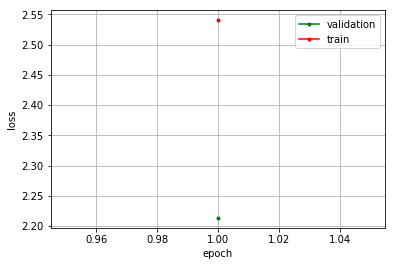

<Figure size 432x288 with 0 Axes>

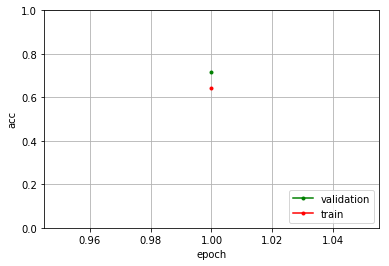

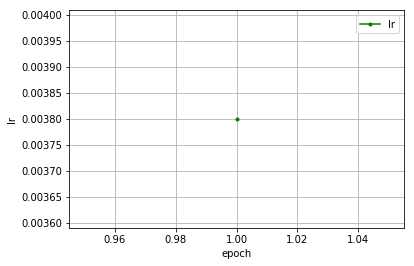

<Figure size 432x288 with 0 Axes>

In [5]:
import os
import matplotlib
#Jupyterでインライン表示するための宣言
%matplotlib inline
plot_log.plot_results(output_dir, os.path.join(output_dir, 'tsv_logger.tsv'))

## valid,test setのloss,acc評価

In [11]:
# Custom Functionを使ったmodelを別環境で使用するには、modelをロードする際に引数として、[custom_objects]を指定するがある
# https://qiita.com/tkinjo1/items/51f9e2d0d9c4659bde8a
#model = keras.models.load_model(os.path.join(output_dir, 'finetuning.h5'), custom_objects={'lr':lr_metric})
model = keras.models.load_model(os.path.join(output_dir, 'finetuning.h5'))

# 多クラス分類のgenerator から、evaluate_generator 関数使って、generator の指定ディレクトリ全体の正解率とlossを出す
# 注意；batch size ごとに予測するから総数/batch_size が割り切れる数になっていないと、あまりの分が2回predictされてしまう
print('--- validation ---')
val_loss, val_acc = base_predict.pred_classes_evaluate_generator(model, d_cls.valid_gen)
print('--- test ---')
test_loss, test_acc = base_predict.pred_classes_evaluate_generator(model, d_cls.test_gen)

--- validation ---
loss =  2.207026481628418
acc =  0.7189349180759763
--- test ---
loss =  2.1608825094559614
acc =  0.7764705882352941


## predict+混同行列

In [5]:
# Custom Functionを使ったmodelを別環境で使用するには、modelをロードする際に引数として、[custom_objects]を指定するがある
# https://qiita.com/tkinjo1/items/51f9e2d0d9c4659bde8a
#load_model = keras.models.load_model(os.path.join(output_dir, 'finetuning.h5'), custom_objects={'lr':lr_metric})
load_model = keras.models.load_model(os.path.join(output_dir, 'finetuning.h5'))

conf_matrix.py: loaded as module file
y_pred_list_str: ['beagle' 'beagle' 'beagle' 'beagle' 'marin' 'beagle' 'beagle' 'marin'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle'
 'beagle' 'beagle' 'other' 'beagle' 'other' 'beagle' 'marin' 'beagle'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'marin' 'beagle' 'beagle'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'comic_book' 'beagle' 'tumblr' 'other' 'bikini' 'other' 'other' 'other'
 'other' 'comic_book' 'comic_book' 'bikini' 'comic_book' 'other' 'marin'
 'comic_book' 'comic_book' 'marin' 'comic_book' 'comic_book' 'comic_book'
 

C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

      beagle       0.94      0.85      0.89        40
      bikini       0.77      1.00      0.87        40
        boke       0.00      0.00      0.00         5
         cat       0.00      0.00      0.00         4
  comic_book       0.88      0.55      0.68        40
     fashion       0.80      1.00      0.89        40
       marin       0.46      0.68      0.55        40
       other       0.38      0.42      0.40        40
      shingo       0.77      0.57      0.66        40
        suit       0.00      0.00      0.00         9
      tumblr       0.98      1.00      0.99        40

   micro avg       0.72      0.72      0.72       338
   macro avg       0.54      0.55      0.54       338
weighted avg       0.71      0.72      0.70       338

Confusion matrix, without normalization


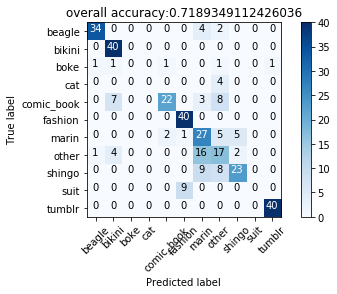

Filename PredictionLabel PredictionScore
0       beagle\Boston_bull_IMG_9631.JPG          beagle           0.705
1  beagle\Brittany_spaniel_IMG_4224.JPG          beagle            0.96
2         beagle\Chihuahua_IMG_4561.JPG          beagle           0.996
3         beagle\Chihuahua_IMG_5361.JPG          beagle           0.985
4         beagle\Chihuahua_IMG_7405.JPG           marin           0.365

<Figure size 432x288 with 0 Axes>

In [6]:
# validation set predict

# generatorで全件予測
pred_df = base_predict.pred_classes_generator(load_model, d_cls.valid_gen, classes_list=class_name)

# 出力先ディレクトリ
pred_output_dir = os.path.join(output_dir, 'prediction', 'valid')
os.makedirs(pred_output_dir, exist_ok=True)

# 予測結果のデータフレームから混同行列作成
base_predict.conf_matrix_from_pred_classes_generator(pred_df, classes, pred_output_dir)

# 予測結果のデータフレーム出力
pred_df.to_csv(os.path.join(pred_output_dir, 'pred.tsv'), sep='\t')
pred_df.head()

y_pred_list_str: ['marin' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle'
 'beagle' 'beagle' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'bikini' 'bikini' 'bikini' 'bikini' 'other' 'marin' 'comic_book'
 'comic_book' 'comic_book' 'comic_book' 'comic_book' 'comic_book'
 'comic_book' 'beagle' 'other' 'comic_book' 'beagle' 'fashion' 'fashion'
 'fashion' 'fashion' 'fashion' 'fashion' 'fashion' 'fashion' 'fashion'
 'marin' 'other' 'marin' 'other' 'marin' 'marin' 'marin' 'marin' 'other'
 'other' 'marin' 'marin' 'beagle' 'marin' 'other' 'marin' 'marin' 'other'
 'marin' 'other' 'shingo' 'shingo' 'shingo' 'shingo' 'shingo' 'shingo'
 'shingo' 'shingo' 'shingo' 'shingo' 'suit' 'fashion' 'fashion' 'tumblr'
 'tumblr' 'tumblr' 'tumblr' 'tumblr' 'tumblr' 'tumblr' 'tumblr' 'tumblr'
 'tumblr']
y_true_label_np: ['beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle'
 'beagle' 'beagle' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'bikini' 'bikini' 'biki

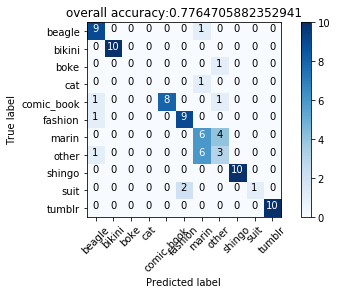

Filename PredictionLabel  \
0                   beagle\African_grey_IMG_9379.JPG           marin   
1  beagle\American_Staffordshire_terrier_IMG_4650...          beagle   
2  beagle\American_Staffordshire_terrier_IMG_4837...          beagle   
3  beagle\American_Staffordshire_terrier_IMG_5230...          beagle   
4  beagle\American_Staffordshire_terrier_IMG_6339...          beagle   

  PredictionScore  
0           0.326  
1           0.993  
2           0.966  
3           0.986  
4           0.979

<Figure size 432x288 with 0 Axes>

In [7]:
# test set predict

# generatorで全件予測
pred_df = base_predict.pred_classes_generator(load_model, d_cls.test_gen, classes_list=class_name)

# 出力先ディレクトリ
pred_output_dir = os.path.join(output_dir, 'prediction', 'test')
os.makedirs(pred_output_dir, exist_ok=True)

# 予測結果のデータフレームから混同行列作成
base_predict.conf_matrix_from_pred_classes_generator(pred_df, classes, pred_output_dir)

# 予測結果のデータフレーム出力
pred_df.to_csv(os.path.join(pred_output_dir, 'pred.tsv'), sep='\t')
pred_df.head()

## 1件ずつ予測+GradCam

In [5]:
def gradcam_from_img_path(load_model, pred_path, classes, img_rows, img_cols, layer_name='multiply_1'):
    """
    画像1件のファイルパスからgradcam実行+ファイル出力
    Arges:
        load_model: modelオブジェクト
        pred_path: 予測する画像ファイルパス
        classes: クラス名リスト
        img_rows, img_cols: 画像サイズ
        layer_name: gradcam掛ける層の名前
    Return:
        なし（gradcam画像ファイル出力）
    """
    import os, sys
    import matplotlib.pyplot as plt
    from keras.preprocessing import image
    
    # grad_cam掛けるクラスid取得
    pred_id = base_predict.pred_from_1img(load_model, pred_path, classes, img_rows, img_cols)
    #print('pred_id:', str(pred_id))
    pred_label = classes[pred_id]
    #print('pred_label', pred_label)

    # 入力画像ロード(image.load_img)してをarray型に変換(image.img_to_array)
    x = image.img_to_array(image.load_img(pred_path, target_size=(img_rows, img_cols)))
    X = grad_cam.preprocess_x(x)

    # grad_cam
    class_output = load_model.output[:, pred_id]
    jetcam = grad_cam.grad_cam(load_model, X, x, layer_name, img_rows, img_cols, class_output)

    # Grad-cam画像保存+表示
    grad_cam_img = image.array_to_img(jetcam)
    plt.imshow(grad_cam_img)
    plt.show()

    # TP/FN/FP/TN/NAN を判定し、判定結果を出力パスに含める
    y_true_label = os.path.basename(os.path.dirname(pred_path)) # 正解ラベルであるファイルの直上のフォルダ名のみを取得
    #print(y_true_label)
    judge = grad_cam.judge_evaluate(pred_label, y_true_label, positive=y_true_label, negative=pred_id)
    judge_out_grad_cam_dir = os.path.join(output_dir, 'gradcam', judge)
    out_jpg = os.path.join(judge_out_grad_cam_dir, y_true_label+'_'+os.path.basename(pred_path)+'_pred_'+classes[pred_id]+'.jpg')
    print(out_jpg)

    # ファイル出力
    os.makedirs(judge_out_grad_cam_dir, exist_ok=True)
    grad_cam_img.save(out_jpg, 'JPEG', quality=100, optimize=True)

In [2]:
# Custom Functionを使ったmodelを別環境で使用するには、modelをロードする際に引数として、[custom_objects]を指定するがある
# https://qiita.com/tkinjo1/items/51f9e2d0d9c4659bde8a
#load_model = keras.models.load_model(os.path.join(output_dir, 'finetuning.h5'), custom_objects={'lr':lr_metric})
load_model = keras.models.load_model(os.path.join(output_dir, 'finetuning.h5'))

NameError: name 'keras' is not defined

In [10]:
load_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 331, 331, 3)  0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 165, 165, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 165, 165, 96) 0           stem_bn1[0][0]                   
__________________________________________________________________________________________________
reduction_

__________________________________________________________________________________________________
separable_conv_1_reduction_righ (None, 42, 42, 84)   9156        activation_19[0][0]              
__________________________________________________________________________________________________
separable_conv_1_reduction_left (None, 42, 42, 84)   7812        activation_21[0][0]              
__________________________________________________________________________________________________
activation_18 (Activation)      (None, 42, 42, 84)   0           separable_conv_1_bn_reduction_rig
__________________________________________________________________________________________________
separable_conv_1_bn_reduction_r (None, 42, 42, 84)   336         separable_conv_1_reduction_right3
__________________________________________________________________________________________________
separable_conv_1_bn_reduction_l (None, 42, 42, 84)   336         separable_conv_1_reduction_left4_
__________

__________________________________________________________________________________________________
activation_34 (Activation)      (None, 42, 42, 336)  0           reduction_concat_stem_2[0][0]    
__________________________________________________________________________________________________
activation_35 (Activation)      (None, 42, 42, 1008) 0           normal_concat_0[0][0]            
__________________________________________________________________________________________________
adjust_conv_projection_1 (Conv2 (None, 42, 42, 168)  56448       activation_34[0][0]              
__________________________________________________________________________________________________
normal_conv_1_1 (Conv2D)        (None, 42, 42, 168)  169344      activation_35[0][0]              
__________________________________________________________________________________________________
adjust_bn_1 (BatchNormalization (None, 42, 42, 168)  672         adjust_conv_projection_1[0][0]   
__________

__________________________________________________________________________________________________
separable_conv_2_bn_normal_righ (None, 42, 42, 168)  672         separable_conv_2_normal_right1_2[
__________________________________________________________________________________________________
separable_conv_2_bn_normal_left (None, 42, 42, 168)  672         separable_conv_2_normal_left2_2[0
__________________________________________________________________________________________________
separable_conv_2_bn_normal_righ (None, 42, 42, 168)  672         separable_conv_2_normal_right2_2[
__________________________________________________________________________________________________
normal_left3_2 (AveragePooling2 (None, 42, 42, 168)  0           normal_bn_1_2[0][0]              
__________________________________________________________________________________________________
normal_left4_2 (AveragePooling2 (None, 42, 42, 168)  0           adjust_bn_2[0][0]                
__________

__________________________________________________________________________________________________
separable_conv_1_normal_right2_ (None, 42, 42, 168)  29736       activation_78[0][0]              
__________________________________________________________________________________________________
separable_conv_1_normal_left5_4 (None, 42, 42, 168)  29736       activation_80[0][0]              
__________________________________________________________________________________________________
separable_conv_1_bn_normal_left (None, 42, 42, 168)  672         separable_conv_1_normal_left1_4[0
__________________________________________________________________________________________________
separable_conv_1_bn_normal_righ (None, 42, 42, 168)  672         separable_conv_1_normal_right1_4[
__________________________________________________________________________________________________
separable_conv_1_bn_normal_left (None, 42, 42, 168)  672         separable_conv_1_normal_left2_4[0
__________

                                                                 normal_bn_1_5[0][0]              
__________________________________________________________________________________________________
normal_concat_5 (Concatenate)   (None, 42, 42, 1008) 0           adjust_bn_5[0][0]                
                                                                 normal_add_1_5[0][0]             
                                                                 normal_add_2_5[0][0]             
                                                                 normal_add_3_5[0][0]             
                                                                 normal_add_4_5[0][0]             
                                                                 normal_add_5_5[0][0]             
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 42, 42, 1008) 0           normal_concat_5[0][0]            
__________

activation_108 (Activation)     (None, 21, 21, 336)  0           separable_conv_1_bn_normal_left1_
__________________________________________________________________________________________________
activation_110 (Activation)     (None, 21, 21, 336)  0           separable_conv_1_bn_normal_right1
__________________________________________________________________________________________________
activation_112 (Activation)     (None, 21, 21, 336)  0           separable_conv_1_bn_normal_left2_
__________________________________________________________________________________________________
activation_114 (Activation)     (None, 21, 21, 336)  0           separable_conv_1_bn_normal_right2
__________________________________________________________________________________________________
activation_116 (Activation)     (None, 21, 21, 336)  0           separable_conv_1_bn_normal_left5_
__________________________________________________________________________________________________
separable_

normal_conv_1_9 (Conv2D)        (None, 21, 21, 336)  677376      activation_130[0][0]             
__________________________________________________________________________________________________
adjust_bn_9 (BatchNormalization (None, 21, 21, 336)  1344        adjust_conv_projection_9[0][0]   
__________________________________________________________________________________________________
normal_bn_1_9 (BatchNormalizati (None, 21, 21, 336)  1344        normal_conv_1_9[0][0]            
__________________________________________________________________________________________________
activation_131 (Activation)     (None, 21, 21, 336)  0           normal_bn_1_9[0][0]              
__________________________________________________________________________________________________
activation_133 (Activation)     (None, 21, 21, 336)  0           adjust_bn_9[0][0]                
__________________________________________________________________________________________________
activation

normal_left3_10 (AveragePooling (None, 21, 21, 336)  0           normal_bn_1_10[0][0]             
__________________________________________________________________________________________________
normal_left4_10 (AveragePooling (None, 21, 21, 336)  0           adjust_bn_10[0][0]               
__________________________________________________________________________________________________
normal_right4_10 (AveragePoolin (None, 21, 21, 336)  0           adjust_bn_10[0][0]               
__________________________________________________________________________________________________
separable_conv_2_bn_normal_left (None, 21, 21, 336)  1344        separable_conv_2_normal_left5_10[
__________________________________________________________________________________________________
normal_add_1_10 (Add)           (None, 21, 21, 336)  0           separable_conv_2_bn_normal_left1_
                                                                 separable_conv_2_bn_normal_right1
__________

separable_conv_1_bn_normal_righ (None, 21, 21, 336)  1344        separable_conv_1_normal_right1_12
__________________________________________________________________________________________________
separable_conv_1_bn_normal_left (None, 21, 21, 336)  1344        separable_conv_1_normal_left2_12[
__________________________________________________________________________________________________
separable_conv_1_bn_normal_righ (None, 21, 21, 336)  1344        separable_conv_1_normal_right2_12
__________________________________________________________________________________________________
separable_conv_1_bn_normal_left (None, 21, 21, 336)  1344        separable_conv_1_normal_left5_12[
__________________________________________________________________________________________________
activation_168 (Activation)     (None, 21, 21, 336)  0           separable_conv_1_bn_normal_left1_
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
cropping2d_4 (Cropping2D)       (None, 21, 21, 2016) 0           zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
reduction_concat_reduce_12 (Con (None, 11, 11, 2688) 0           reduction_add_2_reduce_12[0][0]  
                                                                 reduction_add3_reduce_12[0][0]   
                                                                 add_4[0][0]                      
                                                                 reduction_add4_reduce_12[0][0]   
__________________________________________________________________________________________________
adjust_avg_pool_1_13 (AveragePo (None, 11, 11, 2016) 0           adjust_relu_1_13[0][0]           
__________________________________________________________________________________________________
adjust_avg

__________________________________________________________________________________________________
activation_211 (Activation)     (None, 11, 11, 672)  0           separable_conv_1_bn_normal_left5_
__________________________________________________________________________________________________
separable_conv_2_normal_left1_1 (None, 11, 11, 672)  468384      activation_203[0][0]             
__________________________________________________________________________________________________
separable_conv_2_normal_right1_ (None, 11, 11, 672)  457632      activation_205[0][0]             
__________________________________________________________________________________________________
separable_conv_2_normal_left2_1 (None, 11, 11, 672)  468384      activation_207[0][0]             
__________________________________________________________________________________________________
separable_conv_2_normal_right2_ (None, 11, 11, 672)  457632      activation_209[0][0]             
__________

__________________________________________________________________________________________________
activation_228 (Activation)     (None, 11, 11, 672)  0           adjust_bn_16[0][0]               
__________________________________________________________________________________________________
activation_230 (Activation)     (None, 11, 11, 672)  0           adjust_bn_16[0][0]               
__________________________________________________________________________________________________
activation_232 (Activation)     (None, 11, 11, 672)  0           adjust_bn_16[0][0]               
__________________________________________________________________________________________________
activation_234 (Activation)     (None, 11, 11, 672)  0           normal_bn_1_16[0][0]             
__________________________________________________________________________________________________
separable_conv_1_normal_left1_1 (None, 11, 11, 672)  468384      activation_226[0][0]             
__________

__________________________________________________________________________________________________
normal_add_1_17 (Add)           (None, 11, 11, 672)  0           separable_conv_2_bn_normal_left1_
                                                                 separable_conv_2_bn_normal_right1
__________________________________________________________________________________________________
normal_add_2_17 (Add)           (None, 11, 11, 672)  0           separable_conv_2_bn_normal_left2_
                                                                 separable_conv_2_bn_normal_right2
__________________________________________________________________________________________________
normal_add_3_17 (Add)           (None, 11, 11, 672)  0           normal_left3_17[0][0]            
                                                                 adjust_bn_17[0][0]               
__________________________________________________________________________________________________
normal_add

util.py: loaded as module file
D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\train\beagle\basset_IMG_4602.JPG


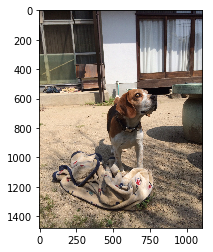

['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']
[[9.9320036e-01 2.2546989e-04 2.1886245e-04 2.4051394e-04 3.6041671e-04
  7.4364746e-04 1.2542548e-03 2.9573580e-03 4.6697847e-04 1.5572734e-04
  1.7652751e-04]]
max_pred_label :  beagle
Tensor("multiply_3/mul:0", shape=(?, 11, 11, 4032), dtype=float32)
Tensor("gradients/FC_avg/Mean_grad/truediv:0", shape=(?, 11, 11, 4032), dtype=float32)


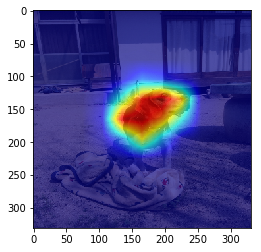

D:\work\keras_iPhone_pictures\01_classes_results\20190122_NASNetLarge\gradcam\TP\beagle_basset_IMG_4602.JPG_pred_beagle.jpg


In [7]:
# 入力画像のファイルパス
data_paths = glob.glob(train_data_dir+'/**', recursive=True)
pred_path = data_paths[50]

# 画像1件のファイルパスからgradcam実行+ファイル出力
grad_cam_img = grad_cam_util.gradcam_from_img_path(load_model, pred_path, output_dir, classes, img_rows, img_cols, layer_name='multiply_3')

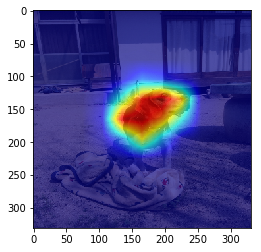

In [10]:
# 入力画像のファイルパス
data_paths = glob.glob(train_data_dir+'/**', recursive=True)
pred_path = data_paths[50]

# print文を一時的に表示させないようにする
# http://hyokonia.tumblr.com/post/6548673449/pythonprint%E6%96%87%E3%82%92%E4%B8%80%E6%99%82%E7%9A%84%E3%81%AB%E8%A1%A8%E7%A4%BA%E3%81%95%E3%81%9B%E3%81%AA%E3%81%84%E3%82%88%E3%81%86%E3%81%AB%E3%81%99%E3%82%8B
import io
output = io.StringIO()
sys.stdout = output

# 画像1件のファイルパスからgradcam実行+ファイル出力
grad_cam_img = grad_cam_util.gradcam_from_img_path(load_model, pred_path, output_dir, classes, img_rows, img_cols
                                                   , layer_name='multiply_3', show_img=False)
plt.imshow(grad_cam_img)
plt.show()

# print表示できるように設定もとに戻す
# http://hyokonia.tumblr.com/post/6548673449/pythonprint%E6%96%87%E3%82%92%E4%B8%80%E6%99%82%E7%9A%84%E3%81%AB%E8%A1%A8%E7%A4%BA%E3%81%95%E3%81%9B%E3%81%AA%E3%81%84%E3%82%88%E3%81%86%E3%81%AB%E3%81%99%E3%82%8B
sys.stdout = sys.__stdout__

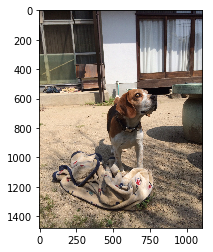

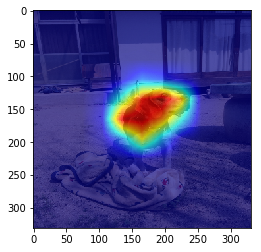

In [11]:
# 入力画像のファイルパス
data_paths = glob.glob(train_data_dir+'/**', recursive=True)
pred_path = data_paths[50]

# 画像1件のファイルパスからgradcam実行+ファイル出力
gradcam_from_img_path(load_model, pred_path, classes, img_rows, img_cols, layer_name='multiply_3')

### K.set_learning_phase 指定無しのGradCamとK.set_learning_phase(0) のGradCamは同じ結果になる 

In [ ]:
import keras.backend as K
K.clear_session()
K.set_learning_phase(0)

load_model = keras.models.load_model(os.path.join(output_dir, 'finetuning.h5'))

# 入力画像のファイルパス
data_paths = glob.glob(train_data_dir+'/**', recursive=True)
pred_path = data_paths[50]

# 画像1件のファイルパスからgradcam実行+ファイル出力
grad_cam_img = grad_cam_util.gradcam_from_img_path(load_model, pred_path, output_dir, classes, img_rows, img_cols
                                                   , layer_name='multiply_3', show_img_print=False)
plt.imshow(grad_cam_img)
plt.show()

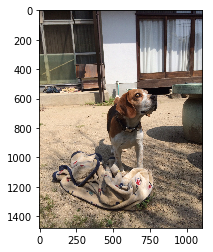

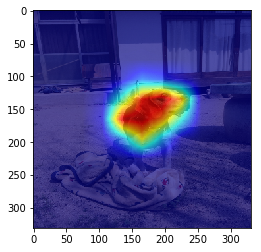

In [23]:
# print表示できるように設定もとに戻す
# http://hyokonia.tumblr.com/post/6548673449/pythonprint%E6%96%87%E3%82%92%E4%B8%80%E6%99%82%E7%9A%84%E3%81%AB%E8%A1%A8%E7%A4%BA%E3%81%95%E3%81%9B%E3%81%AA%E3%81%84%E3%82%88%E3%81%86%E3%81%AB%E3%81%99%E3%82%8B
sys.stdout = sys.__stdout__

from keras.preprocessing import image

import keras.backend as K
K.clear_session()
K.set_learning_phase(0)

#load_model = keras.models.load_model(os.path.join(output_dir, 'finetuning.h5'), custom_objects={'lr':lr_metric})
load_model = keras.models.load_model(os.path.join(output_dir, 'finetuning.h5'))

# 入力画像のファイルパス
data_paths = glob.glob(train_data_dir+'/**', recursive=True)
pred_path = data_paths[50]

# 画像1件のファイルパスからgradcam実行+ファイル出力
gradcam_from_img_path(load_model, pred_path, classes, img_rows, img_cols, layer_name='multiply_3')

### K.set_learning_phase(1) はやっぱ間違い 
### K.set_learning_phase 指定無しのGradCamと違う結果になる 

D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\train\beagle\basset_IMG_4602.JPG


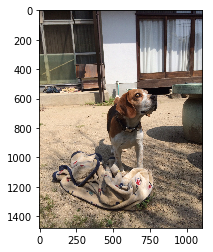

['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']
[[0.01 0.04 0.01 0.01 0.51 0.04 0.09 0.11 0.18 0.01 0.  ]]
max_pred_label :  comic_book
pred_id: 4
Tensor("multiply_1/mul:0", shape=(?, 9, 9, 1536), dtype=float32)
Tensor("gradients/FC_avg/Mean_grad/truediv:0", shape=(?, 9, 9, 1536), dtype=float32)


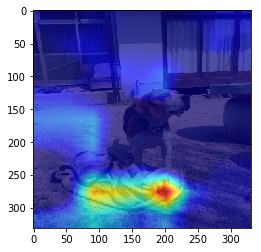

D:\work\keras_iPhone_pictures\01_classes_results\20190122\gradcam\FN\beagle_basset_IMG_4602.JPG_pred_comic_book.jpg


In [18]:
from keras.preprocessing import image

import keras.backend as K
K.clear_session()
K.set_learning_phase(1)

#load_model = keras.models.load_model(os.path.join(output_dir, 'finetuning.h5'), custom_objects={'lr':lr_metric})
load_model = keras.models.load_model(os.path.join(output_dir, 'finetuning.h5'))

# 入力画像のファイルパス
data_paths = glob.glob(train_data_dir+'/**', recursive=True)
pred_path = data_paths[50]

# 画像1件のファイルパスからgradcam実行+ファイル出力
gradcam_from_img_path(load_model, pred_path, classes, img_rows, img_cols)

### 他の画像でもGradCam実行

In [19]:
import keras.backend as K
K.clear_session()
load_model = keras.models.load_model(os.path.join(output_dir, 'finetuning.h5'))

D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\validation\marin\bannister_IMG_6670.JPG


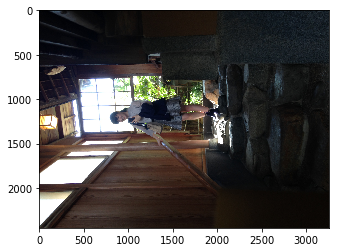

['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']
[[3.60e-05 4.16e-07 4.12e-07 5.03e-06 8.35e-06 4.81e-04 7.16e-01 2.76e-01
  8.04e-03 2.17e-06 8.35e-08]]
max_pred_label :  marin
pred_id: 6
Tensor("multiply_1/mul:0", shape=(?, 9, 9, 1536), dtype=float32)
Tensor("gradients/FC_avg/Mean_grad/truediv:0", shape=(?, 9, 9, 1536), dtype=float32)


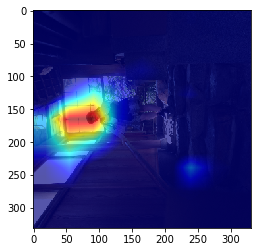

D:\work\keras_iPhone_pictures\01_classes_results\20190122\gradcam\FN\marin_bannister_IMG_6670.JPG_pred_marin.jpg


In [20]:
from keras.preprocessing import image

data_paths = glob.glob(validation_data_dir+'/**', recursive=True)
pred_path = data_paths[200]

# 画像1件のファイルパスからgradcam実行+ファイル出力
gradcam_from_img_path(load_model, pred_path, classes, img_rows, img_cols)

D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\validation\other\Granny_Smith_IMG_2518.JPG


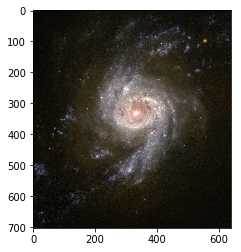

['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']
[[1.27e-04 1.31e-05 2.50e-05 1.73e-04 2.74e-04 4.69e-05 4.42e-03 9.90e-01
  4.39e-03 3.85e-05 1.39e-05]]
max_pred_label :  other
pred_id: 7
Tensor("multiply_1/mul:0", shape=(?, 9, 9, 1536), dtype=float32)
Tensor("gradients_1/FC_avg/Mean_grad/truediv:0", shape=(?, 9, 9, 1536), dtype=float32)


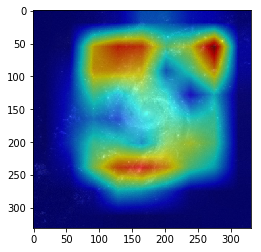

D:\work\keras_iPhone_pictures\01_classes_results\20190122\gradcam\FN\other_Granny_Smith_IMG_2518.JPG_pred_other.jpg


In [21]:
from keras.preprocessing import image

data_paths = glob.glob(validation_data_dir+'/**', recursive=True)
pred_path = data_paths[250]

# 画像1件のファイルパスからgradcam実行+ファイル出力
gradcam_from_img_path(load_model, pred_path, classes, img_rows, img_cols)

D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\validation\fashion\Loafer_IMG_1140.JPG


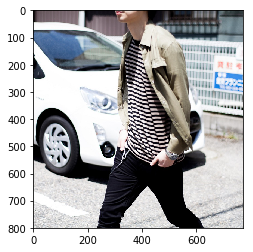

['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']
[[3.64e-08 2.61e-07 1.34e-06 2.57e-07 2.44e-05 1.00e+00 1.51e-06 5.36e-05
  7.58e-06 3.10e-04 1.78e-07]]
max_pred_label :  fashion
pred_id: 5
Tensor("multiply_1/mul:0", shape=(?, 9, 9, 1536), dtype=float32)
Tensor("gradients_2/FC_avg/Mean_grad/truediv:0", shape=(?, 9, 9, 1536), dtype=float32)


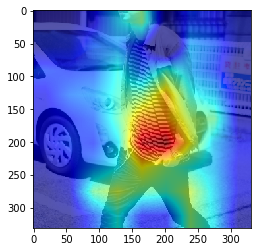

D:\work\keras_iPhone_pictures\01_classes_results\20190122\gradcam\FN\fashion_Loafer_IMG_1140.JPG_pred_fashion.jpg


In [22]:
from keras.preprocessing import image

data_paths = glob.glob(validation_data_dir+'/**', recursive=True)
pred_path = data_paths[150]

# 画像1件のファイルパスからgradcam実行+ファイル出力
gradcam_from_img_path(load_model, pred_path, classes, img_rows, img_cols)

D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\validation\cat\Egyptian_cat_IMG_0844.JPG


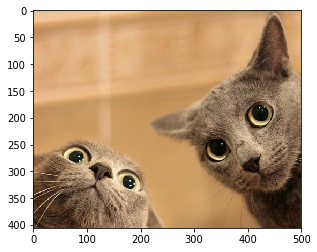

['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']
[[4.19e-03 4.75e-05 1.21e-02 9.04e-01 1.53e-03 1.28e-04 6.51e-04 7.58e-02
  4.42e-04 1.30e-03 5.14e-05]]
max_pred_label :  cat
pred_id: 3
Tensor("multiply_1/mul:0", shape=(?, 9, 9, 1536), dtype=float32)
Tensor("gradients_3/FC_avg/Mean_grad/truediv:0", shape=(?, 9, 9, 1536), dtype=float32)


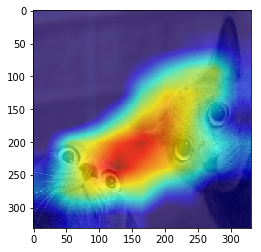

D:\work\keras_iPhone_pictures\01_classes_results\20190122\gradcam\FN\cat_Egyptian_cat_IMG_0844.JPG_pred_cat.jpg


In [23]:
from keras.preprocessing import image

data_paths = glob.glob(validation_data_dir+'/**', recursive=True)
pred_path = data_paths[90]

# 画像1件のファイルパスからgradcam実行+ファイル出力
gradcam_from_img_path(load_model, pred_path, classes, img_rows, img_cols)

D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\validation\bikini\bikini_IMG_0935.JPG


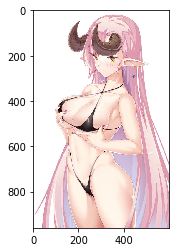

['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']
[[1.70e-08 9.99e-01 2.76e-07 3.65e-07 9.68e-04 2.68e-07 1.43e-06 3.05e-06
  4.76e-06 8.78e-08 5.04e-08]]
max_pred_label :  bikini
pred_id: 1
Tensor("multiply_1/mul:0", shape=(?, 9, 9, 1536), dtype=float32)
Tensor("gradients_4/FC_avg/Mean_grad/truediv:0", shape=(?, 9, 9, 1536), dtype=float32)


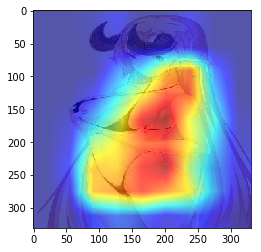

D:\work\keras_iPhone_pictures\01_classes_results\20190122\gradcam\FN\bikini_bikini_IMG_0935.JPG_pred_bikini.jpg


In [24]:
from keras.preprocessing import image

data_paths = glob.glob(validation_data_dir+'/**', recursive=True)
pred_path = data_paths[60]

# 画像1件のファイルパスからgradcam実行+ファイル出力
gradcam_from_img_path(load_model, pred_path, classes, img_rows, img_cols)

D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\test\bikini\abaya_IMG_8125.JPG


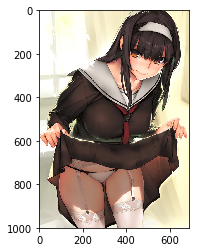

['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']
[[8.52e-05 9.88e-01 1.35e-04 9.35e-05 1.04e-02 1.26e-04 6.61e-04 5.89e-04
  1.14e-04 9.53e-05 3.76e-05]]
max_pred_label :  bikini
Tensor("multiply_3_2/mul:0", shape=(?, 11, 11, 4032), dtype=float32)
Tensor("gradients_5/FC_avg_6/Mean_grad/truediv:0", shape=(?, 11, 11, 4032), dtype=float32)


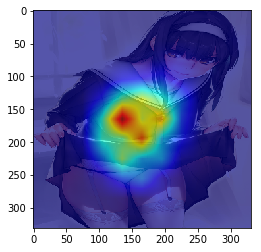

D:\work\keras_iPhone_pictures\01_classes_results\20190122_NASNetLarge\gradcam\TP\bikini_abaya_IMG_8125.JPG_pred_bikini.jpg


In [58]:
from keras.preprocessing import image

data_paths = glob.glob(test_dir+'/**', recursive=True)
pred_path = data_paths[13]

# 画像1件のファイルパスからgradcam実行+ファイル出力
gradcam_from_img_path(load_model, pred_path, classes, img_rows, img_cols, layer_name='multiply_3')

# --------------------------------------------------------------------------------------------

# Optunaで学習実行

In [15]:
# モジュールimport
import os, sys
sys.path.append(r'C:\Users\shingo\jupyter_notebook\tfgpu_py36_work\02_keras_py')
from dataset import plot_log, prepare_data, util, plot_12task_log, util
from transformer import get_train_valid_test, my_generator
from model import define_model, multi_loss, my_callback, my_metric
from predicter import roc_curve, conf_matrix, multi_predict, grad_cam, ensemble_predict, base_predict
from tuning import optuna_train_base, optuna_train_Tox21, optuna_util

sys.path.append(r'C:\Users\shingo\Git\keras-squeeze-excite-network')
import se_inception_v3, se_densenet, se_inception_resnet_v2, se_resnet, se_resnext, se

import keras
import optuna
import numpy as np
import shutil
%matplotlib inline

# 入力ディレクトリ
train_data_dir = r'D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\train'
train_samples = util.file_count(train_data_dir, r'.JPG')+util.file_count(train_data_dir, r'.PNG')+util.file_count(train_data_dir, r'.jpg')+util.file_count(train_data_dir, r'.png') 
print('train_samples:', train_samples)

validation_data_dir = r'D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\validation'
val_samples = util.file_count(validation_data_dir, r'.JPG')+util.file_count(validation_data_dir, r'.PNG')+util.file_count(validation_data_dir, r'.jpg')+util.file_count(validation_data_dir, r'.png')
print('val_samples:', val_samples)

# 画像管理クラス
d_cls=get_train_valid_test.LabeledDataset([331, 331, 3]
                                          , 5#20
                                          , valid_batch_size=5
                                          , test_batch_size=1
                                          , train_samples = train_samples
                                          , valid_samples = val_samples
                                         )

# 基本コールバック
def get_cb(output_dir, cosine_annealing_num_epoch=None):
    cb = []

    # ログを保存するカスタムコールバック
    cb.append(my_callback.tsv_logger(os.path.join(output_dir, 'tsv_logger.tsv')))
    
    # epochごとに学習曲線保存する自作callback
    cb.append(my_callback.learning_curve_plot(os.path.join(output_dir, 'learning_curve.png')))
    
    # 各エポックでval_lossが最小となるモデル保存
    cb.append(keras.callbacks.ModelCheckpoint(filepath=os.path.join(output_dir, 'finetuning.h5'), monitor='val_loss', save_best_only=True, verbose=1))

    # 過学習の抑制 <early_stopping_pati>step続けてval_loss減らなかったら打ち切る
    cb.append(keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1))
    
    return cb

train_samples: 3309
val_samples: 338
train_steps_per_epoch : 165
valid_steps_per_epoch : 67


### 目的関数の定義
#### チューニング可能パラメータ
- モデル（ニューラルネットワーク）
    - Imagenetの学習済みモデル
    - fine-tuning
    - 全結合0-5層（重みの初期値はhe_normal(He の正規分布)で固定）
        - ユニット数 (同じ値か層ごとに減らす)
        - dropout_rate (全層同じ値になる)
        - Batch_Normalization (全層同じ値になる)
        - l2正則化(weight decay) (全層同じ値になる)
- オプティマイザ
- 学習率
    - 学習率変更なし
    - cosine_annealing(factor=0.01, epochs=None)
    - LearningRateScheduler(lr* 1/4 を3回する)
- データ水増し( keras.preprocessing.image.ImageDataGenerator )
    - 画像の剪断(shear)
    - 拡大縮小(zoom)
    - 回転(rotation)
    - 上下反転(vertical_flip)
    - 左右反転(horizontal_flip)
    - ランダムに画素値に値を足す（channel_shift_range）
    - ランダムに明度を変更（brightness_range）
    - 画像ランダムに切り取り（random_crop）
    - 画像の一部矩形領域を隠す（random_erasing)
    - 画像混ぜる(mix_up)

In [16]:
# 出力ディレクトリ
output_dir = r'D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna'
os.makedirs(output_dir, exist_ok=True)

## best_parameter をval_loss でとる
return_val_loss=True

### チューニング可能パラメータ引数 ###
## model param
choice_model = ['Xception','InceptionResNetV2','NASNetLarge']# 学習済みモデル
trainable = [116, 761, 1017, 'all'] # 重みは全層学習させる（重みunfreeze開始レイヤーを番号で指定できる）
FCnum = [0,1,3] # FC層の数
Dence = [1024, 512, 256, 128] # FC層のユニット数
Dropout = [0.0, 0.5] # FC層のDropout
addBatchNorm = [None] # FC層のBatchNorm
l2 = [0.0, 1e-4] # FC層のl2
choice_optim = ['sgd', 'adam', 'nadam'] # optimizer
lr = [1.0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1] # （初期）学習率
callback_lr = [None, 'cosine_annealing'] # 学習率変更するcallback
callback_save_model=True # モデル保存するcallback つけるか. False なら保存しない

if callback_save_model == True:
    model_dir = os.path.join(output_dir, 'model_weight_optuna')

## ImageDataGenerator param
rescale=1.0/255.0 # 画像の前処理
horizontal_flip=[True, False] # 画像の左右反転
vertical_flip=[True, False] # 画像の上下反転
# 画像の回転の下限角、回転の上限角、回転角の刻み幅
rotation_range_min=0 
rotation_range_max=180
rotation_unit=10 # 0.0 にしたら rotation_range_max で固定
# 画像の縮小の最少-最大倍率、拡大の最少-最大倍率、縮小拡大倍率の刻み幅
zoom_range_low_min=0.5
zoom_range_low_max=1.0
zoom_range_high_min=1.0
zoom_range_high_max=1.5
zoom_range_unit=1.0 # 0.0 にしたら zoom_range_low_min, zoom_range_high_max で固定
# 画像のせん断の最少倍率、せん断の最大倍率、せん断倍率の刻み幅
shear_range_min=0.0
shear_range_max=0.5
shear_range_unit=0.1 # 0.0 にしたら shear_range_max で固定
# ランダムに画素値に値を足す
channel_shift_range_min=0.0
channel_shift_range_max=10.0
channel_shift_range_unit=1.0 # 0.0 にしたら channel_shift なし
# ランダムに明度を変更 brightness_range=[0.3, 1.0]みたいなの
brightness_range_low_min=0.3
brightness_range_low_max=1.0
brightness_range_high_min=1.0
brightness_range_high_max=1.3
brightness_range_unit=0.1 # 0.0 ならランダムに明度変更倍率は固定値(self.brightness_range_low_min, self.brightness_range_high_max)
# 画像のrandom_crop.付ける場合は[224,224]とかにする
random_crop=None 
# random_erasing の確率. 使わない場合は0.0にする
random_erasing_prob=[0.0, 0.5] 
# random_erasing で消す領域の画素の最大値
random_erasing_maxpixel=255.0 
# mixup 含めるか
mix_up_alpha=[0.0, 0.2] 

# パラメータを引数に持たせてoptunaの目的関数を定義
objective = optuna_train_base.Objective(out_dir=output_dir
                                        , d_cls=d_cls
                                        , train_data_dir=r'D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\train'
                                        , validation_data_dir=r'D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\validation'
                                        , test_dir=r'D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\test'
                                        , shape=[331, 331, 3]
                                        , num_classes=11
                                        , class_name=['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']
                                        , epochs=5
                                        , gpu_count=1
                                        , loss='categorical_crossentropy'
                                        , metrics=['acc']
                                        , verbose=2
                                        , activation='softmax'
                                        , pred_kernel_initializer='zeros'
                                        , pred_l2_rate=0.0001
                                        , FCpool='GlobalAveragePooling2D'
                                        , return_val_loss=return_val_loss
                                        , callbacks=get_cb(output_dir, cosine_annealing_num_epoch=None)
                                        , callback_save_model=callback_save_model
                                        , choice_model=choice_model
                                        , trainable=trainable
                                        , FCnum=FCnum
                                        , Dence=Dence
                                        , Dropout=Dropout
                                        , addBatchNorm=addBatchNorm
                                        , l2=l2
                                        , choice_optim=choice_optim
                                        , lr=lr
                                        , callback_lr=callback_lr
                                        , horizontal_flip=horizontal_flip
                                        , vertical_flip=vertical_flip
                                        , rotation_range_min=rotation_range_min
                                        , rotation_range_max=rotation_range_max
                                        , rotation_unit=rotation_unit
                                        , zoom_range_low_min=zoom_range_low_min
                                        , zoom_range_low_max=zoom_range_low_max
                                        , zoom_range_high_min=zoom_range_high_min
                                        , zoom_range_high_max=zoom_range_high_max
                                        , zoom_range_unit=zoom_range_unit
                                        , shear_range_min=shear_range_min
                                        , shear_range_max=shear_range_max
                                        , shear_range_unit=shear_range_unit
                                        , channel_shift_range_min=channel_shift_range_min
                                        , channel_shift_range_max=channel_shift_range_max
                                        , channel_shift_range_unit=channel_shift_range_unit
                                        , brightness_range_low_min=brightness_range_low_min
                                        , brightness_range_low_max=brightness_range_low_max
                                        , brightness_range_high_min=brightness_range_high_min
                                        , brightness_range_high_max=brightness_range_high_max
                                        , brightness_range_unit=brightness_range_unit
                                        , random_crop=random_crop 
                                        , random_erasing_prob=random_erasing_prob
                                        , random_erasing_maxpixel=random_erasing_maxpixel
                                        , mix_up_alpha=mix_up_alpha
                                       )

### 最適化の実行

In [ ]:
%%time
# sqlite 使って履歴ファイル作る
sqllite_path = output_dir+'/example.db'
if os.path.exists(sqllite_path) == True:
    os.remove(sqllite_path) # sqllite_pathすでにあれば一旦削除
study = optuna.create_study(study_name='example-study', storage='sqlite:///'+sqllite_path)

study.optimize(objective, n_trials=100)

[I 2019-01-23 00:52:34,011] A new study created with name: example-study


----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge 761
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False


C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\keras\models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 384 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 288 0.0 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.0001 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 01:02:05,718] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,42,42,168] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/Nadam/gradients/zeros_810-0-1-TransposeNCHWToNHWC-LayoutOptimizer = Transpose[T=DT_FLOAT, Tperm=DT_INT32, _devi

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge 116
FCnum = 0
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 01:12:25,873] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_normal_right1_2/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception all
FCnum = 1
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.5 None he_normal 0.0001
---- choice_optim = sgd ----
sgd_lr sgd_momentum sgd_decay sgd_nesterov = 1.0 0.9 0.0 True
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 01:13:16,733] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,728,21,21] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: block8_sepconv1/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="NCHW", dilations=

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception 1017
FCnum = 0
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
---- choice_optim = adam ----
adam_lr adam_decay beta_1 beta_2 = 0.0001 0.0 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.
 - 612s - loss: 0.3046 - acc: 0.1191 - val_loss: 0.3046 - val_acc: 0.1194

Epoch 00001: val_loss improved from inf to 0.30464, saving model to D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna\finetuning.h5

Epoch 00001: val_loss improved from inf to 0.30464, saving model to D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna\model_weight_optuna\4.h5
Epoch 2/5
 - 544s - 

[I 2019-01-23 02:00:28,465] Finished a trial resulted in value: 0.3046361207962036. Current best value is 0.3046361207962036 with parameters: {'FCnum': 0, 'add_se': False, 'branch_Tox21_12task': False, 'brightness_range_high': 1.2000000000000002, 'brightness_range_low': 0.7000000000000001, 'callback_lr': 'cosine_annealing', 'channel_shift_range_unit': 7.0, 'choice_model': 'Xception', 'choice_optim': 'adam', 'horizontal_flip': True, 'lr': 0.0001, 'mix_up_alpha': 0.2, 'random_erasing_prob': 0.0, 'rotation_range': 20.0, 'sedensenet_num': 169, 'seresnet_num': 154, 'seresnext_num': 50, 'shear_range': 0.1, 'trainable': 1017, 'vertical_flip': False, 'zoom_range_high': 1.0, 'zoom_range_low': 1.0}.


----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception 761
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 1e-05 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 02:01:12,788] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,2048,11,11] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/Nadam/gradients/FC_avg/Mean_grad/truediv-0-TransposeNHWCToNCHW-LayoutOptimizer = Transpose[T=DT_FLOAT, Tperm=D

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception 116
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.5 None he_normal 0.0
---- choice_optim = sgd ----
sgd_lr sgd_momentum sgd_decay sgd_nesterov = 0.1 0.9 0.0 True
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 02:02:20,351] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,1024,21,21] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/SGD/gradients/zeros_18 = Fill[T=DT_FLOAT, _class=["loc:@train...kpropInput"], index_type=DT_INT32, _device="/j

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge 1017
FCnum = 1
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.0 None he_normal 0.0
---- choice_optim = sgd ----
sgd_lr sgd_momentum sgd_decay sgd_nesterov = 0.001 0.9 0.0 True
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 02:08:32,367] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_2_normal_left2_4/separable_conv2d/depthwise = DepthwiseConv2dNative[T=DT_FLOAT, _class=["loc:@train...kpr

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = InceptionResNetV2 1017
FCnum = 1
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.5 None he_normal 0.0
---- choice_optim = adam ----
adam_lr adam_decay beta_1 beta_2 = 0.0001 0.0 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.
 - 326s - loss: 0.3046 - acc: 0.1209 - val_loss: 0.3046 - val_acc: 0.1194

Epoch 00001: val_loss did not improve

Epoch 00001: val_loss improved from inf to 0.30464, saving model to D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna\model_weight_optuna\8.h5
Epoch 2/5
 - 306s - loss: 0.3046 - a

[I 2019-01-23 02:36:35,530] Finished a trial resulted in value: 0.3046361207962036. Current best value is 0.3046361207962036 with parameters: {'FCnum': 0, 'add_se': False, 'branch_Tox21_12task': False, 'brightness_range_high': 1.2000000000000002, 'brightness_range_low': 0.7000000000000001, 'callback_lr': 'cosine_annealing', 'channel_shift_range_unit': 7.0, 'choice_model': 'Xception', 'choice_optim': 'adam', 'horizontal_flip': True, 'lr': 0.0001, 'mix_up_alpha': 0.2, 'random_erasing_prob': 0.0, 'rotation_range': 20.0, 'sedensenet_num': 169, 'seresnet_num': 154, 'seresnext_num': 50, 'shear_range': 0.1, 'trainable': 1017, 'vertical_flip': False, 'zoom_range_high': 1.0, 'zoom_range_low': 1.0}.


----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception 116
FCnum = 0
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
---- choice_optim = adam ----
adam_lr adam_decay beta_1 beta_2 = 0.1 0.0 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 02:37:42,538] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,1024,21,21] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: block13_sepconv2_bn/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Adam/gradients/AddN_18"], data_f

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge 1017
FCnum = 0
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 1e-05 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 02:49:17,539] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/Nadam/gradients/zeros_793 = Fill[T=DT_FLOAT, _class=["loc:@train...kpropInput"], index_type=DT_INT32, _device="

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge 1017
FCnum = 0
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
---- choice_optim = adam ----
adam_lr adam_decay beta_1 beta_2 = 0.1 0.0 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 02:56:36,450] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_2_normal_left2_4/separable_conv2d/depthwise = DepthwiseConv2dNative[T=DT_FLOAT, _class=["loc:@train...kpr

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception 116
FCnum = 1
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.5 None he_normal 0.0
---- choice_optim = sgd ----
sgd_lr sgd_momentum sgd_decay sgd_nesterov = 1.0 0.9 0.0 True
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 02:57:47,944] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,2048,11,11] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: block14_sepconv2_bn/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/SGD/gradients/AddN_7"], data_for

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = InceptionResNetV2 all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 768 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 768 0.5 None he_normal 0.0
---- choice_optim = sgd ----
sgd_lr sgd_momentum sgd_decay sgd_nesterov = 0.01 0.9 0.0 True
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 03:00:02,482] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,2080,9,9] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: block8_8_conv/convolution = Conv2D[T=DT_FLOAT, _class=["loc:@training/SGD/gradients/block8_8_conv/convolution_grad/Conv2D

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 64 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 64 0.0 None he_normal 0.0001
---- choice_optim = sgd ----
sgd_lr sgd_momentum sgd_decay sgd_nesterov = 0.0001 0.9 0.0 True
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 03:06:01,789] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: activation_50/Relu = Relu[T=DT_FLOAT, _class=["loc:@training/SGD/gradients/activation_50/Relu_grad/ReluGrad"], _device="

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = InceptionResNetV2 116
FCnum = 1
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0001
---- choice_optim = sgd ----
sgd_lr sgd_momentum sgd_decay sgd_nesterov = 1.0 0.9 0.0 True
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.
 - 331s - loss: 0.2457 - acc: 0.4291 - val_loss: 1.9296 - val_acc: 0.1164

Epoch 00001: val_loss did not improve

Epoch 00001: val_loss improved from inf to 1.92964, saving model to D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna\model_weight_optuna\15.h5
Epoch 2/5
 - 305s - loss: 0.2

[I 2019-01-23 03:34:28,742] Finished a trial resulted in value: 0.17689356029923284. Current best value is 0.17689356029923284 with parameters: {'Dence_1': 128, 'Dropout': 0.0, 'FCnum': 1, 'addBatchNorm': None, 'add_se': False, 'branch_Tox21_12task': False, 'brightness_range_high': 1.3, 'brightness_range_low': 0.9, 'callback_lr': 'cosine_annealing', 'channel_shift_range_unit': 3.0, 'choice_model': 'InceptionResNetV2', 'choice_optim': 'sgd', 'horizontal_flip': True, 'l2': 0.0001, 'lr': 1.0, 'mix_up_alpha': 0.0, 'random_erasing_prob': 0.0, 'rotation_range': 100.0, 'sedensenet_num': 169, 'seresnet_num': 154, 'seresnext_num': 50, 'shear_range': 0.5, 'trainable': 116, 'vertical_flip': True, 'zoom_range_high': 1.0, 'zoom_range_low': 1.0}.


----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception 1017
FCnum = 0
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
---- choice_optim = sgd ----
sgd_lr sgd_momentum sgd_decay sgd_nesterov = 0.1 0.9 0.0 True
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.
 - 315s - loss: 0.3046 - acc: 0.1209 - val_loss: 0.3046 - val_acc: 0.1194

Epoch 00001: val_loss did not improve

Epoch 00001: val_loss improved from inf to 0.30464, saving model to D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna\model_weight_optuna\16.h5
Epoch 2/5
 - 299s - loss: 0.3046 - acc: 0.1207 - val_loss: 0.3046 - val_acc: 0.1194

Epoch 00002: val_loss did not improve


[I 2019-01-23 04:00:09,192] Finished a trial resulted in value: 0.3046361207962036. Current best value is 0.17689356029923284 with parameters: {'Dence_1': 128, 'Dropout': 0.0, 'FCnum': 1, 'addBatchNorm': None, 'add_se': False, 'branch_Tox21_12task': False, 'brightness_range_high': 1.3, 'brightness_range_low': 0.9, 'callback_lr': 'cosine_annealing', 'channel_shift_range_unit': 3.0, 'choice_model': 'InceptionResNetV2', 'choice_optim': 'sgd', 'horizontal_flip': True, 'l2': 0.0001, 'lr': 1.0, 'mix_up_alpha': 0.0, 'random_erasing_prob': 0.0, 'rotation_range': 100.0, 'sedensenet_num': 169, 'seresnet_num': 154, 'seresnext_num': 50, 'shear_range': 0.5, 'trainable': 116, 'vertical_flip': True, 'zoom_range_high': 1.0, 'zoom_range_low': 1.0}.


----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception 116
FCnum = 1
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.0 None he_normal 0.0
---- choice_optim = sgd ----
sgd_lr sgd_momentum sgd_decay sgd_nesterov = 0.1 0.9 0.0 True
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 04:00:54,851] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,2048,11,11] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: block14_sepconv2/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...kpropInput"], data_format="NCHW", dilation

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception 761
FCnum = 0
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
---- choice_optim = adam ----
adam_lr adam_decay beta_1 beta_2 = 0.1 0.0 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.
 - 296s - loss: 0.3046 - acc: 0.1206 - val_loss: 0.3046 - val_acc: 0.1194

Epoch 00001: val_loss did not improve

Epoch 00001: val_loss improved from inf to 0.30464, saving model to D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna\model_weight_optuna\18.h5
Epoch 2/5
 - 278s - loss: 0.3046 - acc: 0.1220 - val_loss: 0.3046 - val_acc: 0.1194

Epoch 00002: val_loss did not improve

Epoch 00

[I 2019-01-23 04:24:46,934] Finished a trial resulted in value: 0.3046361207962036. Current best value is 0.17689356029923284 with parameters: {'Dence_1': 128, 'Dropout': 0.0, 'FCnum': 1, 'addBatchNorm': None, 'add_se': False, 'branch_Tox21_12task': False, 'brightness_range_high': 1.3, 'brightness_range_low': 0.9, 'callback_lr': 'cosine_annealing', 'channel_shift_range_unit': 3.0, 'choice_model': 'InceptionResNetV2', 'choice_optim': 'sgd', 'horizontal_flip': True, 'l2': 0.0001, 'lr': 1.0, 'mix_up_alpha': 0.0, 'random_erasing_prob': 0.0, 'rotation_range': 100.0, 'sedensenet_num': 169, 'seresnet_num': 154, 'seresnext_num': 50, 'shear_range': 0.5, 'trainable': 116, 'vertical_flip': True, 'zoom_range_high': 1.0, 'zoom_range_low': 1.0}.


----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception 1017
FCnum = 0
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
---- choice_optim = adam ----
adam_lr adam_decay beta_1 beta_2 = 1e-05 0.0 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.
 - 559s - loss: 0.3046 - acc: 0.1191 - val_loss: 0.3046 - val_acc: 0.1194

Epoch 00001: val_loss did not improve

Epoch 00001: val_loss improved from inf to 0.30464, saving model to D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna\model_weight_optuna\19.h5
Epoch 2/5
 - 537s - loss: 0.3046 - acc: 0.1213 - val_loss: 0.3046 - val_acc: 0.1194

Epoch 00002: val_loss did not improve

Epoch

[I 2019-01-23 05:10:46,931] Finished a trial resulted in value: 0.3046361207962036. Current best value is 0.17689356029923284 with parameters: {'Dence_1': 128, 'Dropout': 0.0, 'FCnum': 1, 'addBatchNorm': None, 'add_se': False, 'branch_Tox21_12task': False, 'brightness_range_high': 1.3, 'brightness_range_low': 0.9, 'callback_lr': 'cosine_annealing', 'channel_shift_range_unit': 3.0, 'choice_model': 'InceptionResNetV2', 'choice_optim': 'sgd', 'horizontal_flip': True, 'l2': 0.0001, 'lr': 1.0, 'mix_up_alpha': 0.0, 'random_erasing_prob': 0.0, 'rotation_range': 100.0, 'sedensenet_num': 169, 'seresnet_num': 154, 'seresnext_num': 50, 'shear_range': 0.5, 'trainable': 116, 'vertical_flip': True, 'zoom_range_high': 1.0, 'zoom_range_low': 1.0}.


----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = InceptionResNetV2 1017
FCnum = 0
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
---- choice_optim = adam ----
adam_lr adam_decay beta_1 beta_2 = 0.01 0.0 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.
 - 615s - loss: 0.3046 - acc: 0.1188 - val_loss: 0.3046 - val_acc: 0.1194

Epoch 00001: val_loss did not improve

Epoch 00001: val_loss improved from inf to 0.30464, saving model to D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna\model_weight_optuna\20.h5
Epoch 2/5
 - 576s - loss: 0.3046 - acc: 0.1232 - val_loss: 0.3046 - val_acc: 0.1194

Epoch 00002: val_loss did not improv

[I 2019-01-23 06:02:25,460] Finished a trial resulted in value: 0.3046361207962036. Current best value is 0.17689356029923284 with parameters: {'Dence_1': 128, 'Dropout': 0.0, 'FCnum': 1, 'addBatchNorm': None, 'add_se': False, 'branch_Tox21_12task': False, 'brightness_range_high': 1.3, 'brightness_range_low': 0.9, 'callback_lr': 'cosine_annealing', 'channel_shift_range_unit': 3.0, 'choice_model': 'InceptionResNetV2', 'choice_optim': 'sgd', 'horizontal_flip': True, 'l2': 0.0001, 'lr': 1.0, 'mix_up_alpha': 0.0, 'random_erasing_prob': 0.0, 'rotation_range': 100.0, 'sedensenet_num': 169, 'seresnet_num': 154, 'seresnext_num': 50, 'shear_range': 0.5, 'trainable': 116, 'vertical_flip': True, 'zoom_range_high': 1.0, 'zoom_range_low': 1.0}.


----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception 1017
FCnum = 0
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
---- choice_optim = sgd ----
sgd_lr sgd_momentum sgd_decay sgd_nesterov = 0.1 0.9 0.0 True
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.
 - 286s - loss: 0.3046 - acc: 0.1212 - val_loss: 0.3046 - val_acc: 0.1194

Epoch 00001: val_loss did not improve

Epoch 00001: val_loss improved from inf to 0.30464, saving model to D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna\model_weight_optuna\21.h5
Epoch 2/5
 - 269s - loss: 0.3046 - acc: 0.1194 - val_loss: 0.3046 - val_acc: 0.1194

Epoch 00002: val_loss did not improve


[W 2019-01-23 06:15:10,397] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,2048,11,11] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/SGD/gradients/zeros_1 = Fill[T=DT_FLOAT, _class=["loc:@train...kpropInput"], index_type=DT_INT32, _device="/jo

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge 116
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 96 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 48 0.5 None he_normal 0.0
---- choice_optim = adam ----
adam_lr adam_decay beta_1 beta_2 = 0.0001 0.0 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 06:27:20,531] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,42,42,168] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/Adam/gradients/zeros_914-0-1-TransposeNCHWToNHWC-LayoutOptimizer = Transpose[T=DT_FLOAT, Tperm=DT_INT32, _devic

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 1
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.0 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.001 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 06:40:21,678] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_normal_right2_1/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception 1017
FCnum = 1
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.5 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.0001 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 06:41:11,194] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,2048,11,11] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/Nadam/gradients/FC_avg/Mean_grad/truediv-0-TransposeNHWCToNCHW-LayoutOptimizer = Transpose[T=DT_FLOAT, Tperm=D

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge 116
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 192 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 144 0.5 None he_normal 0.0001
---- choice_optim = adam ----
adam_lr adam_decay beta_1 beta_2 = 0.01 0.0 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 06:52:04,482] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,42,42,168] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/Adam/gradients/zeros_914-0-1-TransposeNCHWToNHWC-LayoutOptimizer = Transpose[T=DT_FLOAT, Tperm=DT_INT32, _devic

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = InceptionResNetV2 761
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 96 0.0 None he_normal 0.0
---- choice_optim = sgd ----
sgd_lr sgd_momentum sgd_decay sgd_nesterov = 0.1 0.9 0.0 True
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.
 - 645s - loss: 0.2189 - acc: 0.4442 - val_loss: 0.1507 - val_acc: 0.6388

Epoch 00001: val_loss improved from 0.17689 to 0.15070, saving mo

[I 2019-01-23 07:45:01,435] Finished a trial resulted in value: 0.1152179426749918. Current best value is 0.1152179426749918 with parameters: {'Dence_1': 256, 'Dence_2': 128.0, 'Dence_3': 96.0, 'Dropout': 0.0, 'FCnum': 3, 'addBatchNorm': None, 'add_se': False, 'branch_Tox21_12task': False, 'brightness_range_high': 1.2000000000000002, 'brightness_range_low': 0.9, 'callback_lr': 'cosine_annealing', 'channel_shift_range_unit': 7.0, 'choice_model': 'InceptionResNetV2', 'choice_optim': 'sgd', 'horizontal_flip': True, 'l2': 0.0, 'lr': 0.1, 'mix_up_alpha': 0.2, 'random_erasing_prob': 0.0, 'rotation_range': 50.0, 'sedensenet_num': 169, 'seresnet_num': 154, 'seresnext_num': 50, 'shear_range': 0.0, 'trainable': 761, 'vertical_flip': False, 'zoom_range_high': 1.5, 'zoom_range_low': 1.0}.


----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.5 None he_normal 0.0
---- choice_optim = sgd ----
sgd_lr sgd_momentum sgd_decay sgd_nesterov = 1.0 0.9 0.0 True
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 07:46:08,748] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,21,21,728] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/SGD/gradients/zeros_83-0-1-TransposeNCHWToNHWC-LayoutOptimizer = Transpose[T=DT_FLOAT, Tperm=DT_INT32, _device=

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge 761
FCnum = 1
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.5 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 1.0 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 07:57:16,310] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_normal_left1_2/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...kpropInput"], data_format="N

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception all
FCnum = 1
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.01 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 07:58:11,163] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,728,21,21] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: block7_sepconv1/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...kpropInput"], data_format="NCHW", dilations=

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge 761
FCnum = 1
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0
---- choice_optim = sgd ----
sgd_lr sgd_momentum sgd_decay sgd_nesterov = 0.1 0.9 0.0 True
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 08:03:04,238] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/SGD/gradients/zeros_775 = Fill[T=DT_FLOAT, _class=["loc:@train...kpropInput"], index_type=DT_INT32, _device="/j

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception all
FCnum = 1
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.5 None he_normal 0.0001
---- choice_optim = adam ----
adam_lr adam_decay beta_1 beta_2 = 1.0 0.0 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 08:04:22,819] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,728,21,21] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/Adam/gradients/zeros_95 = Fill[T=DT_FLOAT, _class=["loc:@train...kpropInput"], index_type=DT_INT32, _device="/j

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception 761
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 192 0.0 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 1.0 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 08:05:14,679] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,2048,11,11] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/Nadam/gradients/FC_avg/Mean_grad/truediv-0-TransposeNHWCToNCHW-LayoutOptimizer = Transpose[T=DT_FLOAT, Tperm=D

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = InceptionResNetV2 all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 192 0.0 None he_normal 0.0
---- choice_optim = adam ----
adam_lr adam_decay beta_1 beta_2 = 0.01 0.0 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 08:07:52,335] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,1088,19,19] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: block17_20_conv/convolution = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="NCHW", dilations=[1, 

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception all
FCnum = 0
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
---- choice_optim = adam ----
adam_lr adam_decay beta_1 beta_2 = 1e-05 0.0 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 08:08:49,616] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,728,21,21] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: block7_sepconv2/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...kpropInput"], data_format="NCHW", dilations=

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception 1017
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.5 None he_normal 0.0
---- choice_optim = sgd ----
sgd_lr sgd_momentum sgd_decay sgd_nesterov = 1e-05 0.9 0.0 True
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.
 - 593s - loss: 0.3046 - acc: 0.1142 - val_loss: 0.3046 - val_acc: 0.1194

Epoch 00001: val_loss did not improve

Epoch 00001: val_loss improved

[I 2019-01-23 08:57:11,982] Finished a trial resulted in value: 0.3046361207962036. Current best value is 0.1152179426749918 with parameters: {'Dence_1': 256, 'Dence_2': 128.0, 'Dence_3': 96.0, 'Dropout': 0.0, 'FCnum': 3, 'addBatchNorm': None, 'add_se': False, 'branch_Tox21_12task': False, 'brightness_range_high': 1.2000000000000002, 'brightness_range_low': 0.9, 'callback_lr': 'cosine_annealing', 'channel_shift_range_unit': 7.0, 'choice_model': 'InceptionResNetV2', 'choice_optim': 'sgd', 'horizontal_flip': True, 'l2': 0.0, 'lr': 0.1, 'mix_up_alpha': 0.2, 'random_erasing_prob': 0.0, 'rotation_range': 50.0, 'sedensenet_num': 169, 'seresnet_num': 154, 'seresnext_num': 50, 'shear_range': 0.0, 'trainable': 761, 'vertical_flip': False, 'zoom_range_high': 1.5, 'zoom_range_low': 1.0}.


----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception 761
FCnum = 1
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.5 None he_normal 0.0001
---- choice_optim = adam ----
adam_lr adam_decay beta_1 beta_2 = 0.0001 0.0 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 08:58:18,106] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,1024,21,21] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/Adam/gradients/AddN_14-1-TransposeNHWCToNCHW-LayoutOptimizer = Transpose[T=DT_FLOAT, Tperm=DT_INT32, _device="

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.0 None he_normal 0.0
---- choice_optim = sgd ----
sgd_lr sgd_momentum sgd_decay sgd_nesterov = 1e-05 0.9 0.0 True
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 08:59:26,451] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,21,21,728] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/SGD/gradients/zeros_77-0-1-TransposeNCHWToNHWC-LayoutOptimizer = Transpose[T=DT_FLOAT, Tperm=DT_INT32, _device=

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = InceptionResNetV2 116
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 384 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 288 0.5 None he_normal 0.0
---- choice_optim = adam ----
adam_lr adam_decay beta_1 beta_2 = 1.0 0.0 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 09:02:46,342] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,9,9,256] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/Adam/gradients/zeros_85-0-1-TransposeNCHWToNHWC-LayoutOptimizer = Transpose[T=DT_FLOAT, Tperm=DT_INT32, _device="

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception 116
FCnum = 0
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
---- choice_optim = sgd ----
sgd_lr sgd_momentum sgd_decay sgd_nesterov = 1e-05 0.9 0.0 True
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 09:03:35,163] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[2048,1536,1,1] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: block14_sepconv2/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...kpropInput"], data_format="NCHW", dilation

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 96 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 96 0.0 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 1e-05 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 09:17:18,794] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_left1_0/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/Ad

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception 761
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.0 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.0001 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 09:18:07,788] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,11,11,2048] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/Nadam/gradients/zeros_1-0-1-TransposeNCHWToNHWC-LayoutOptimizer = Transpose[T=DT_FLOAT, Tperm=DT_INT32, _devic

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception 116
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.0 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.0001 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 09:19:17,154] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,728,21,21] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/Nadam/gradients/zeros_17 = Fill[T=DT_FLOAT, _class=["loc:@train...propFilter"], index_type=DT_INT32, _device="/

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 64 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 32 0.0 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.001 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 09:20:30,585] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,21,21,728] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/Nadam/gradients/zeros_85-0-1-TransposeNCHWToNHWC-LayoutOptimizer = Transpose[T=DT_FLOAT, Tperm=DT_INT32, _devic

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = InceptionResNetV2 116
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 64 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 32 0.0 None he_normal 0.0
---- choice_optim = adam ----
adam_lr adam_decay beta_1 beta_2 = 0.1 0.0 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 09:22:59,477] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,2080,9,9] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: block8_4_conv/convolution = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="NCHW", dilations=[1, 1, 1

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge 761
FCnum = 1
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0001
---- choice_optim = sgd ----
sgd_lr sgd_momentum sgd_decay sgd_nesterov = 1.0 0.9 0.0 True
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 09:28:45,266] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/SGD/gradients/zeros_777 = Fill[T=DT_FLOAT, _class=["loc:@train...kpropInput"], index_type=DT_INT32, _device="/j

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception all
FCnum = 1
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.5 None he_normal 0.0
---- choice_optim = sgd ----
sgd_lr sgd_momentum sgd_decay sgd_nesterov = 1e-05 0.9 0.0 True
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 09:29:53,607] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,728,21,21] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/SGD/gradients/zeros_83 = Fill[T=DT_FLOAT, _class=["loc:@train...propFilter"], index_type=DT_INT32, _device="/jo

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = Xception 761
FCnum = 1
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0001
---- choice_optim = adam ----
adam_lr adam_decay beta_1 beta_2 = 0.0001 0.0 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 09:30:46,163] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,2048,11,11] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: block14_sepconv2/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...kpropInput"], data_format="NCHW", dilation

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = InceptionResNetV2 761
FCnum = 0
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
---- choice_optim = adam ----
adam_lr adam_decay beta_1 beta_2 = 0.001 0.0 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.
 - 336s - loss: 0.1247 - acc: 0.7058 - val_loss: 0.1275 - val_acc: 0.7224

Epoch 00001: val_loss did not improve

Epoch 00001: val_loss improved from inf to 0.12750, saving model to D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna\model_weight_optuna\48.h5
Epoch 2/5
 - 309s - loss: 0.0736 - acc: 0.8376 - val_loss: 0.1388 - val_acc: 0.7313

Epoch 00002: val_loss did not improv

[I 2019-01-23 09:59:12,175] Finished a trial resulted in value: 0.12009845459625236. Current best value is 0.1152179426749918 with parameters: {'Dence_1': 256, 'Dence_2': 128.0, 'Dence_3': 96.0, 'Dropout': 0.0, 'FCnum': 3, 'addBatchNorm': None, 'add_se': False, 'branch_Tox21_12task': False, 'brightness_range_high': 1.2000000000000002, 'brightness_range_low': 0.9, 'callback_lr': 'cosine_annealing', 'channel_shift_range_unit': 7.0, 'choice_model': 'InceptionResNetV2', 'choice_optim': 'sgd', 'horizontal_flip': True, 'l2': 0.0, 'lr': 0.1, 'mix_up_alpha': 0.2, 'random_erasing_prob': 0.0, 'rotation_range': 50.0, 'sedensenet_num': 169, 'seresnet_num': 154, 'seresnext_num': 50, 'shear_range': 0.0, 'trainable': 761, 'vertical_flip': False, 'zoom_range_high': 1.5, 'zoom_range_low': 1.0}.


----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = InceptionResNetV2 all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 384 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 192 0.5 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 10:01:54,647] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,1088,19,19] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: block17_20_conv/convolution = Conv2D[T=DT_FLOAT, _class=["loc:@train...kpropInput"], data_format="NCHW", dilations=[1, 

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 384 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 384 0.0 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 10:13:47,647] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_normal_right2_1/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 96 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 96 0.0 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 10:27:42,420] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_left5_0/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/Ad

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.5 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 10:39:40,092] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_normal_left2_1/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="N

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 96 0.5 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 10:53:46,623] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/Nadam/gradients/zeros_897 = Fill[T=DT_FLOAT, _class=["loc:@train...propFilter"], index_type=DT_INT32, _device="

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 64 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 32 0.0 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 11:07:58,288] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_right2_1/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/A

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.5 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 11:22:16,216] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_left2_1/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/Ad

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 384 0.0 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 11:32:13,366] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_normal_left5_0/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="N

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 384 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 288 0.5 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 11:46:26,101] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_left2_1/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/Ad

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 384 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 192 0.5 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 12:00:26,810] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_left2_1/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/Ad

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.5 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 12:14:37,180] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_left2_1/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/Ad

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 192 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 192 0.0 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 12:28:39,241] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_left5_0/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/Ad

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.0 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 12:38:32,164] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_normal_left5_0/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="N

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 768 0.5 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 12:48:26,757] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_normal_left5_0/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="N

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 384 0.0 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 12:58:18,819] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_normal_left5_0/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="N

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.5 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 13:12:21,268] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_left2_1/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/Ad

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.0 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 13:22:09,758] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_normal_left5_0/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="N

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 96 0.0 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 13:36:31,941] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_left5_0/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/Ad

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 96 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 48 0.0 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 13:50:39,091] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_right1_1/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/A

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.0 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 14:03:49,637] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_normal_left5_0/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="N

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.0 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 14:13:45,372] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_normal_left5_0/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="N

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 192 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 192 0.5 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 14:28:10,310] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_right1_1/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/A

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 768 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 768 0.0 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 14:39:13,905] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_normal_right1_1/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 64 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 64 0.5 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 14:53:27,398] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/Nadam/gradients/zeros_943 = Fill[T=DT_FLOAT, _class=["loc:@train...propFilter"], index_type=DT_INT32, _device="

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 384 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 384 0.0 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 15:05:23,726] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_normal_left2_1/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="N

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 96 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 72 0.0 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 15:19:31,476] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_left5_0/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/Ad

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 64 0.0 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 15:34:05,569] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_left5_0/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/Ad

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 96 0.5 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 15:48:31,809] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/Nadam/gradients/zeros_943 = Fill[T=DT_FLOAT, _class=["loc:@train...propFilter"], index_type=DT_INT32, _device="

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 192 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 96 0.0 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 16:01:47,523] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_normal_right2_1/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.5 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 16:12:49,382] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_normal_left2_1/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="N

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.5 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 16:27:05,023] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/Nadam/gradients/zeros_897 = Fill[T=DT_FLOAT, _class=["loc:@train...propFilter"], index_type=DT_INT32, _device="

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 16:41:36,450] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_left2_1/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/Ad

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.5 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 16:56:07,723] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_left5_0/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/Ad

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.0 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 17:06:07,623] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_normal_left2_1/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="N

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 64 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 64 0.5 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 17:20:29,639] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_left5_0/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/Ad

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 768 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 576 0.5 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 17:31:42,491] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_normal_right1_1/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.5 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 17:43:40,633] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_normal_left1_0/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="N

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.5 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 17:55:47,335] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_normal_left1_0/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="N

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 64 0.5 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 18:10:11,171] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_left2_1/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/Ad

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 768 0.0 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 18:20:13,529] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_normal_left5_0/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="N

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.0 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 18:34:38,748] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_left2_1/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/Ad

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.5 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 18:48:53,373] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_left2_1/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/Ad

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 96 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 72 0.5 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 19:03:06,049] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_left1_0/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/Ad

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 64 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 32 0.5 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 19:17:22,709] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_left5_0/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/Ad

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 64 0.0 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 19:31:38,748] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_left2_1/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/Ad

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 64 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 64 0.5 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 19:46:05,765] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_left2_1/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/Ad

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.5 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 19:59:22,560] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_normal_right2_1/separable_conv2d = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 384 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 192 0.0 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 20:13:53,789] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_left2_1/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/Ad

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.5 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 256 0.5 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 20:28:27,664] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_right1_1/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/A

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 20:42:45,645] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: separable_conv_1_bn_normal_right2_1/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@training/Nadam/gradients/A

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.0 None he_normal 0.0
dence dropout addBatchNorm kernel_initializer l2_rate = 64 0.0 None he_normal 0.0
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


[W 2019-01-23 20:57:00,096] Setting trial status as TrialState.FAIL because of the following error: ResourceExhaustedError()
Traceback (most recent call last):
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v2\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.ResourceExhaustedError: OOM when allocating tensor with shape[20,168,42,42] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/Nadam/gradients/zeros_937 = Fill[T=DT_FLOAT, _class=["loc:@train...propFilter"], index_type=DT_INT32, _device="

----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results\20190122\optuna
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = NASNetLarge all
FCnum = 3
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
add_se = False
----- FC_layer -----
dence dropout addBatchNorm kernel_initializer l2_rate = 128 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 64 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 48 0.5 None he_normal 0.0001
---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.1 0.004 0.9 0.999
Found 338 images belonging to 11 classes.
Found 85 images belonging to 11 classes.
Epoch 1/5
Found 3309 images belonging to 11 classes.


### 結果の確認

In [18]:
# 試行結果データフレームで出力
sqllite_path = output_dir+'/example.db'
study = optuna.Study(study_name='example-study', storage='sqlite:///'+sqllite_path)
df = study.trials_dataframe()
df.to_csv(os.path.join(output_dir, 'optuna_lgb.tsv'), sep='\t')
df

trial_id                state     value             datetime_start  \
                                                                        
0         1      TrialState.FAIL       NaN 2019-01-23 00:52:34.163711   
1         2      TrialState.FAIL       NaN 2019-01-23 01:02:06.036656   
2         3      TrialState.FAIL       NaN 2019-01-23 01:12:26.230127   
3         4  TrialState.COMPLETE  0.304636 2019-01-23 01:13:17.341472   
4         5      TrialState.FAIL       NaN 2019-01-23 02:00:28.465133   
5         6      TrialState.FAIL       NaN 2019-01-23 02:01:13.326559   
6         7      TrialState.FAIL       NaN 2019-01-23 02:02:20.693945   
7         8  TrialState.COMPLETE  0.304636 2019-01-23 02:08:32.684335   
8         9      TrialState.FAIL       NaN 2019-01-23 02:36:35.530871   
9        10      TrialState.FAIL       NaN 2019-01-23 02:37:42.882535   
10       11      TrialState.FAIL       NaN 2019-01-23 02:49:17.892097   
11       12      TrialState.FAIL       NaN 2019-01-23 02:56:36.805967   
12       13      TrialState.FAIL       NaN 2019-01-23 02:57:48.278931   
13       14      TrialState.FAIL       NaN 2019-01-23 03:00:02.844792   
14       15  TrialState.COMPLETE  0.176894 2019-01-23 03:06:02.125668   
15       16  TrialState.COMPLETE  0.304636 2019-01-23 03:34:28.758498   
16       17      TrialState.FAIL       NaN 2019-01-23 04:00:09.192144   
17       18  TrialState.COMPLETE  0.304636 2019-01-23 04:00:55.184479   
18       19  TrialState.COMPLETE  0.304636 2019-01-23 04:24:46.934296   
19       20  TrialState.COMPLETE  0.304636 2019-01-23 05:10:46.931914   
20       21      TrialState.FAIL  0.304636 2019-01-23 06:02:25.460972   
21       22      TrialState.FAIL       NaN 2019-01-23 06:15:10.741276   
22       23      TrialState.FAIL       NaN 2019-01-23 06:27:21.165658   
23       24      TrialState.FAIL       NaN 2019-01-23 06:40:22.032655   
24       25      TrialState.FAIL       NaN 2019-01-23 06:41:11.539926   
25       26  TrialState.COMPLETE  0.115218 2019-01-23 06:52:04.814267   
26       27      TrialState.FAIL       NaN 2019-01-23 07:45:01.449661   
27       28      TrialState.FAIL       NaN 2019-01-23 07:46:09.072855   
28       29      TrialState.FAIL       NaN 2019-01-23 07:57:16.657358   
29       30      TrialState.FAIL       NaN 2019-01-23 07:58:11.508518   
..      ...                  ...       ...                        ...   
70       71      TrialState.FAIL       NaN 2019-01-23 14:28:11.012048   
71       72      TrialState.FAIL       NaN 2019-01-23 14:39:14.288839   
72       73      TrialState.FAIL       NaN 2019-01-23 14:53:27.999679   
73       74      TrialState.FAIL       NaN 2019-01-23 15:05:24.108956   
74       75      TrialState.FAIL       NaN 2019-01-23 15:19:31.838723   
75       76      TrialState.FAIL       NaN 2019-01-23 15:34:05.950388   
76       77      TrialState.FAIL       NaN 2019-01-23 15:48:32.190896   
77       78      TrialState.FAIL       NaN 2019-01-23 16:01:47.863341   
78       79      TrialState.FAIL       NaN 2019-01-23 16:12:49.749504   
79       80      TrialState.FAIL       NaN 2019-01-23 16:27:05.403818   
80       81      TrialState.FAIL       NaN 2019-01-23 16:41:37.046898   
81       82      TrialState.FAIL       NaN 2019-01-23 16:56:08.341418   
82       83      TrialState.FAIL       NaN 2019-01-23 17:06:07.972477   
83       84      TrialState.FAIL       NaN 2019-01-23 17:20:30.016961   
84       85      TrialState.FAIL       NaN 2019-01-23 17:31:42.856382   
85       86      TrialState.FAIL       NaN 2019-01-23 17:43:40.995094   
86       87      TrialState.FAIL       NaN 2019-01-23 17:55:47.686397   
87       88      TrialState.FAIL       NaN 2019-01-23 18:10:11.777448   
88       89      TrialState.FAIL       NaN 2019-01-23 18:20:13.926057   
89       90      TrialState.FAIL       NaN 2019-01-23 18:34:39.146969   
90       91      TrialState.FAIL       NaN 2019-01-23 18:48:53.747371   
91       92      TrialState.FAIL       NaN 2019-01-23 19:03:0

In [19]:
# study.best_params ファイル出力
f = open(os.path.join(output_dir, 'best_params.txt'), 'w') # 書き込みモードで開く
for key,value in sorted(study.best_params.items()):
    f.write('{0}\t{1}\n'.format(key, value))
f.close() # ファイル閉じる
study.best_params

{'Dence_1': 256,
 'Dence_2': 128.0,
 'Dence_3': 96.0,
 'Dropout': 0.0,
 'FCnum': 3,
 'addBatchNorm': None,
 'add_se': False,
 'branch_Tox21_12task': False,
 'brightness_range_high': 1.2000000000000002,
 'brightness_range_low': 0.9,
 'callback_lr': 'cosine_annealing',
 'channel_shift_range_unit': 7.0,
 'choice_model': 'InceptionResNetV2',
 'choice_optim': 'sgd',
 'horizontal_flip': True,
 'l2': 0.0,
 'lr': 0.1,
 'mix_up_alpha': 0.2,
 'random_erasing_prob': 0.0,
 'rotation_range': 50.0,
 'sedensenet_num': 169,
 'seresnet_num': 154,
 'seresnext_num': 50,
 'shear_range': 0.0,
 'trainable': 761,
 'vertical_flip': False,
 'zoom_range_high': 1.5,
 'zoom_range_low': 1.0}

In [20]:
study.best_trial 

FrozenTrial(trial_id=26, state=<TrialState.COMPLETE: 1>, value=0.1152179426749918, datetime_start=datetime.datetime(2019, 1, 23, 6, 52, 4, 814267), datetime_complete=datetime.datetime(2019, 1, 23, 7, 45, 1, 206988), params={'Dence_1': 256, 'Dence_2': 128.0, 'Dence_3': 96.0, 'Dropout': 0.0, 'FCnum': 3, 'addBatchNorm': None, 'add_se': False, 'branch_Tox21_12task': False, 'brightness_range_high': 1.2000000000000002, 'brightness_range_low': 0.9, 'callback_lr': 'cosine_annealing', 'channel_shift_range_unit': 7.0, 'choice_model': 'InceptionResNetV2', 'choice_optim': 'sgd', 'horizontal_flip': True, 'l2': 0.0, 'lr': 0.1, 'mix_up_alpha': 0.2, 'random_erasing_prob': 0.0, 'rotation_range': 50.0, 'sedensenet_num': 169, 'seresnet_num': 154, 'seresnext_num': 50, 'shear_range': 0.0, 'trainable': 761, 'vertical_flip': False, 'zoom_range_high': 1.5, 'zoom_range_low': 1.0}, user_attrs={'FCpool': 'GlobalAveragePooling2D', 'acc': 0.1998169586526104, 'activation': 'softmax', 'callbacks': '[<model.my_callba

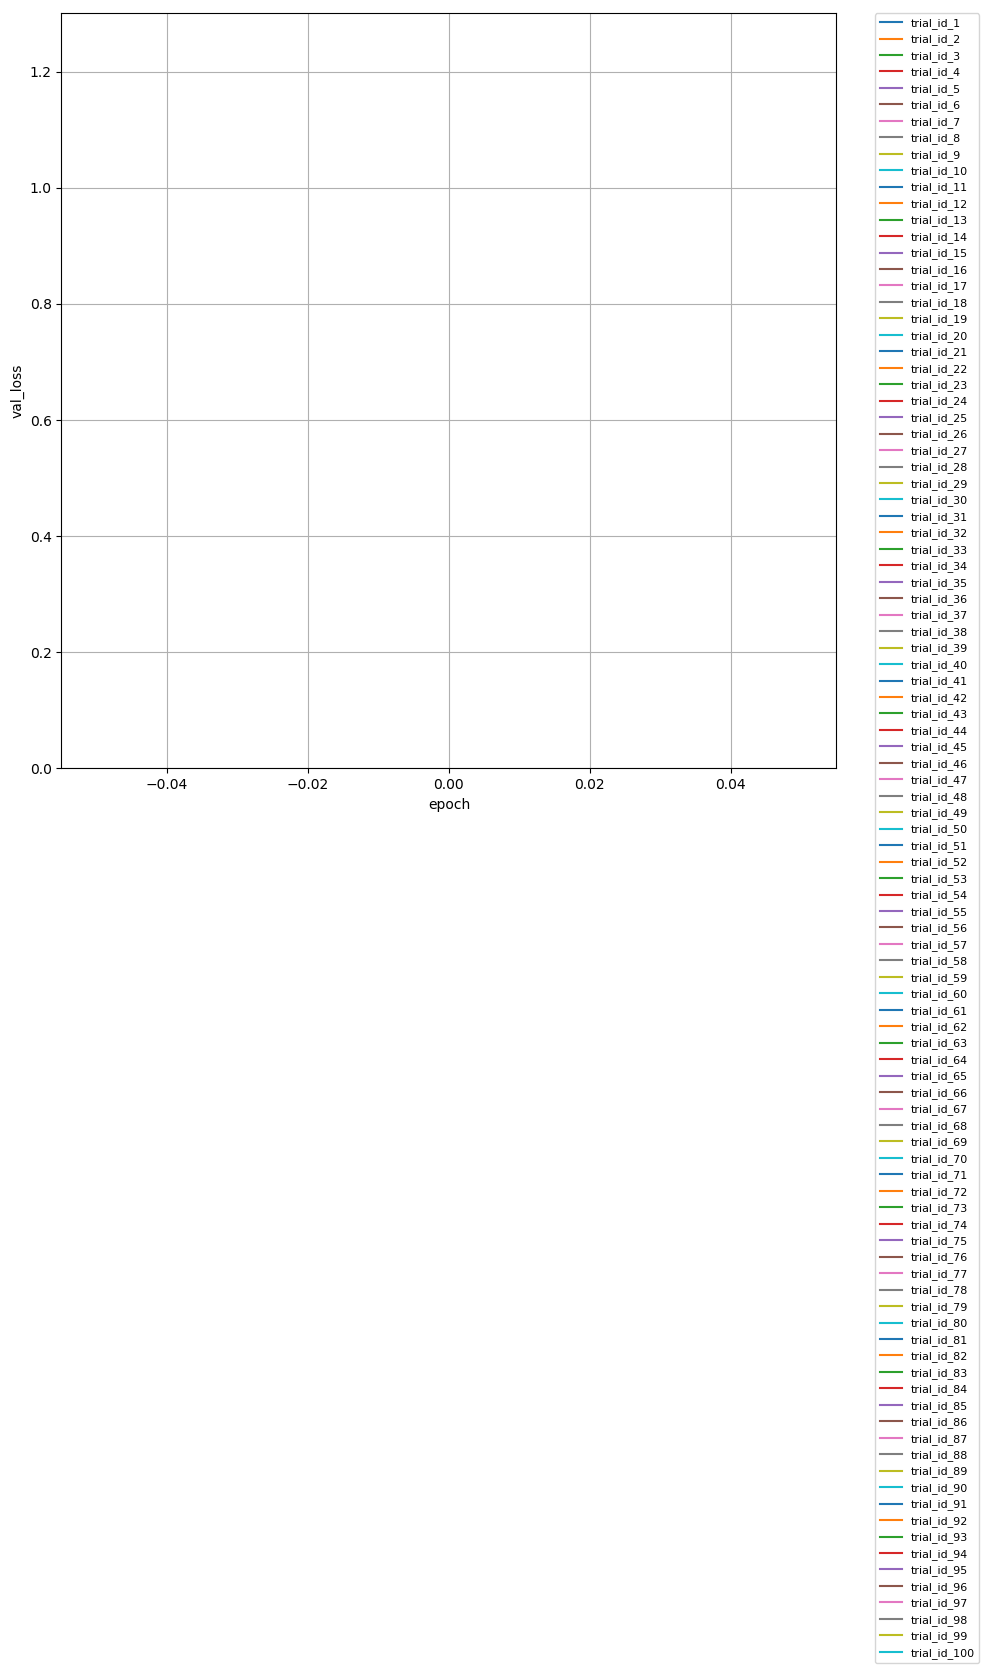

Unnamed: 0  trial_id                state     value  \
0           NaN       NaN                  NaN       NaN   
1           0.0       1.0      TrialState.FAIL       NaN   
2           1.0       2.0      TrialState.FAIL       NaN   
3           2.0       3.0      TrialState.FAIL       NaN   
4           3.0       4.0  TrialState.COMPLETE  0.304636   
5           4.0       5.0      TrialState.FAIL       NaN   
6           5.0       6.0      TrialState.FAIL       NaN   
7           6.0       7.0      TrialState.FAIL       NaN   
8           7.0       8.0  TrialState.COMPLETE  0.304636   
9           8.0       9.0      TrialState.FAIL       NaN   
10          9.0      10.0      TrialState.FAIL       NaN   
11         10.0      11.0      TrialState.FAIL       NaN   
12         11.0      12.0      TrialState.FAIL       NaN   
13         12.0      13.0      TrialState.FAIL       NaN   
14         13.0      14.0      TrialState.FAIL       NaN   
15         14.0      15.0  TrialState.COMPLETE  0.176894   
16         15.0      16.0  TrialState.COMPLETE  0.304636   
17         16.0      17.0      TrialState.FAIL       NaN   
18         17.0      18.0  TrialState.COMPLETE  0.304636   
19         18.0      19.0  TrialState.COMPLETE  0.304636   
20         19.0      20.0  TrialState.COMPLETE  0.304636   
21         20.0      21.0      TrialState.FAIL  0.304636   
22         21.0      22.0      TrialState.FAIL       NaN   
23         22.0      23.0      TrialState.FAIL       NaN   
24         23.0      24.0      TrialState.FAIL       NaN   
25         24.0      25.0      TrialState.FAIL       NaN   
26         25.0      26.0  TrialState.COMPLETE  0.115218   
27         26.0      27.0      TrialState.FAIL       NaN   
28         27.0      28.0      TrialState.FAIL       NaN   
29         28.0      29.0      TrialState.FAIL       NaN   
..          ...       ...                  ...       ...   
71         70.0      71.0      TrialState.FAIL       NaN   
72         71.0      72.0      TrialState.FAIL       NaN   
73         72.0      73.0      TrialState.FAIL       NaN   
74         73.0      74.0      TrialState.FAIL       NaN   
75         74.0      75.0      TrialState.FAIL       NaN   
76         75.0      76.0      TrialState.FAIL       NaN   
77         76.0      77.0      TrialState.FAIL       NaN   
78         77.0      78.0      TrialState.FAIL       NaN   
79         78.0      79.0      TrialState.FAIL       NaN   
80         79.0      80.0      TrialState.FAIL       NaN   
81         80.0      81.0      TrialState.FAIL       NaN   
82         81.0      82.0      TrialState.FAIL       NaN   
83         82.0      83.0      TrialState.FAIL       NaN   
84         83.0      84.0      TrialState.FAIL       NaN   
85         84.0      85.0      TrialState.FAIL       NaN   
86         85.0      86.0      TrialState.FAIL       NaN   
87         86.0      87.0      TrialState.FAIL       NaN   
88         87.0      88.0      TrialState.FAIL       NaN   
89         88.0      89.0      TrialState.FAIL       NaN   
90         89.0      90.0      TrialState.FAIL       NaN   
91         90.0      91.0      TrialState.FAIL       NaN   
92         91.0      92.0      TrialState.FAIL       NaN   
93         92.0      93.0      TrialState.FAIL       NaN   
94         93.0      94.0      TrialState.FAIL       NaN   
95         94.0      95.0      TrialState.FAIL       NaN   
96         95.0      96.0      TrialState.FAIL       NaN   
97         96.0      97.0      TrialState.FAIL       NaN   
98         97.0      98.0      TrialState.FAIL       NaN   
99         98.0      99.0      TrialState.FAIL       NaN   
100        99.0     100.0   TrialState.RUNNING       NaN   

                 datetime_start           datetime_complete   params params.1  \
0                           NaN                         NaN  Dence_1  Dence_2   
1    2019-01-23 00:52:34.163711                         NaN    512.0    384.0   
2    2019-01-23 01:02:06.036656          

<Figure size 432x288 with 0 Axes>

In [21]:
# trial結果ロード
import pandas as pd
result_df = pd.read_table(os.path.join(output_dir, 'optuna_lgb.tsv'))
# optunaのtrial結果plot
optuna_util.trial_plot(output_dir, result_df, epochs=1, val_name="val_loss", trial_id=None)# , trial_id=None # , trial_id=2 # , trial_id=[2,45,46,47,48,49]
result_df